# **Background**

## **Theory**

`Customer Lifecycle` atau siklus pelanggan terdiri dari 5 tahapan: <br>

> **1. Awareness** <br>
> **2. Acquisition** <br>
> **3. Engagement** <br>
> **4. Retention** <br>
> **5. Loyalty** <br>

Tahapan itu merepresentasikan bagaimana *customer* atau pelanggan bermula dari mengetahui produk atau jasa perusahaan sampai menjadi pelanggan yang sangat setia. <br>
<br>
1. Mengetahui `(Awareness)` adalah permulaan dari segalanya. Perusahaan pasti memiliki strategi pemasaran yang dapat menjangkau target marketnya.<br><br>
2. Saat target mengetahui produk/jasa perusahaan dan tertarik untuk melakukan *purchase*, orang tersebut akan terkonversi menjadi pelanggan perusahaan `(Acquisition)` <br><br>
3. Selanjutnya, perusahaan akan menjaga relasi dengan pelanggan dengan menerapkan CRM management seperti mengirimkan *newsletter* bulanan, memberikan promosi di hari ulang tahun pelanggan, mengirimkan *push notification* secara berkala, dan lainnya. Hal-hal tersebut bertujuan untuk mengondisikan pelanggan untuk selalu ingat dan merasa dekat dengan perusahaan `(Engagement)`. <br><br>
4. Kemudian, perusahaan akan selalu berusaha mengetahui apa yang pelanggan butuhkan dengan meminta umpan balik atau *feedback* dari pelanggan dengan pengisian survey atau sarana komplain seperti *Customer Service*, *email help support*, diskon, dsb. Tujuannya adalah agar pelanggan kembali menggunakan produk/jasa perusahaan secara kontinu atau yang biasanya disebut *repeat order* `(Retention)`.<br><br>
5. Pelanggan yang puas dengan produk/jasa perusahaan dan selalu melakukan *repeat order* adalah aset yang sangat berharga bagi perusahaan. Secara emosional, pelanggan selalu merasa bahwa produk/jasa perusahaan berhasil memenuhi kebutuhannya. Pelanggan setia bahkan bisa saja merekomendasikan produk/jasa perusahaan kepada orang lain secara cuma-cuma. `(Loyalty)`.<br>

Seperti *quote* yang sering dikumandangkan: <br>
<br>
`"It costs many times more to acquire a new customer than to retain an existing one"`

Pelanggan yang berhenti menggunakan produk/jasa perusahaan disebut dengan istilah **CHURN**. Pastinya, hal ini sangat tidak diinginkan oleh perusahaan. Pelanggan yang *churn* otomatis akan berhenti juga berkontribusi terhadap pendapatan atau *revenue* perusahaan. Hal tersebut berpotensi mengakibatkan penurunan profit perusahaan. 

## **Real Case**

PT Telco Connect adalah salah satu perusahaan yang menyediakan beragam layanan jasa yang berbasis internet, mulai dari *Internet Service, Online Security, Online Backup, Device Protection, dan Technical Support*. Saat ini perusahaan sedang berfokus pada angka `CHURN` karena angka persentase Churn konsisten meningkat dalam 12 bulan terakhir. <br> <br>

Masalah ini harus segera ditindaklanjuti karena semakin banyak atau semakin besar persentase pelanggan user yang *churn* akan semakin mengurangi pendapatan atau *revenue* perusahaan. Terlebih lagi, apabila perusahaan tidak cukup berhasil mendapatkan pelanggan baru yang dapat menutupi hilangnya pelanggan lama. Akan tetapi, kembali lagi, mendapatkan pelanggan baru menghabiskan biaya (cost) yang berkali-kali lipat lebih besar perusahaan dibandingkan mempertahankan pelanggan lama. Sehingga, meminimalisasi pelanggan lama dan mencegah *Churn* adalah fokus yang tepat bagi perusahaan PT Telco Connect.

PT Telco Connect memiliki sejumlah dana yang selalu dialokasikan setiap bulan untuk `Customer Retention`. Customer retention adalah kemampuan perusahaan untuk membuat pelanggan kembali membeli atau menggunakan layanannya. Pihak management perusahaan ingin memastikan bahwa dana ini digunakan secara optimal dan tepat sasaran. **Kasus ini menjadi sangat penting karena jika tidak ada implementasi strategi yang tepat sasaran untuk mencegah pelanggan yang berpotensi Churn, akan semakin banyak pelanggan yang berhenti menggunakan layanan yang mengakibatkan berkurangnya pendapatan perusahaan dari pelanggan-pelanggan tersebut.**

### Questions

> 1. Bagaimana profil umum pelanggan berdasarkan data secara keseluruhan? <br>
> 1. Bagaimana profil pelanggan berdasarkan kecenderungannya untuk *churn*? <br>
> 1. Berapa kerugian perusahaan karena pelanggan yang *Churn*? <br>
> 1. Bagaimana pembuatan model *maching learning* terbaik yang dapat digunakan dalam kasus ini? <br>
> 1. Bagaimana akurasi dan limitasi dari model tersebut? <br>
> 1. Apa saja solusi *(actionable recommendations)* yang dapat dilakukan perusahaan untuk mencegah pelanggan *Churn*? <br>
> 1. Apa dampak dari solusi tersebut terhadap bisnis perusahaan?<br>
> 1. Apa saja rekomendasi untuk meningkatkan *project* agar lebih baik lagi? <br>

### Goals

- Mendapatkan prediktor pelanggan yang berpotensi *Churn* seakurat mungkin
- Mendapatkan pelanggan-pelanggan yang tepat sasaran untuk dilakukan pencegahan *Churn*
- Menentukan solusi dan strategi yang tepat untuk mencegah pelanggan untuk *Churn*
- Mengetahui dampak dari solusi terhadap PT Telco Connect secara terukur

# **Data Collection & Preprocessing**

In [1]:
import pyforest
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import datasets, metrics, model_selection, svm
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedStratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report, recall_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import RFE, SelectPercentile
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
import pickle

### Importing Dataset

In [2]:
# mengimport dataset
df = pd.read_csv('data_telco_customer_churn.csv')

<IPython.core.display.Javascript object>

### Data Understanding

In [3]:
# menampilkan sampel (head, tail, dan shape) dataset
df

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,No
...,...,...,...,...,...,...,...,...,...,...,...
4925,No,15,No,No,Fiber optic,Yes,Yes,Month-to-month,Yes,103.45,No
4926,Yes,10,No,No,Fiber optic,Yes,Yes,Month-to-month,Yes,91.10,No
4927,No,58,No internet service,No internet service,No,No internet service,No internet service,Two year,No,20.75,No
4928,No,1,No,No,Fiber optic,No,No,Month-to-month,Yes,69.75,Yes


Dengan memanggil dataframe, secara otomatis akan ditampilkan sampel 5 data teratas *(head)* dan 5 data terbawah *(tail)*.
Data terdiri dari 4.930 baris dan 11 kolom.

Dataset ini terdiri dari 10 fitur dan 1 label (Churn), dengan deskripsi sebagai berikut:

|__No__| __Nama Fitur__   | __Tipe Data__ | __Deskripsi__      |
|---| ------ | ---- | --------- |
|1| Dependents  | categorical  | Apakah pelanggan memiliki tanggungan atau tidak   |
|2| Tenure    | numeric   | Durasi pelanggan menjadi customer dalam satuan bulan   |
|3| OnlineSecurity| categorical   | Apakah pelanggan menggunakan layanan pengamanan daring (*online security*) atau tidak  |
|4| OnlineBackup| categorical   | Apakah pelanggan menggunakan layanan *back up* daring atau tidak  |
|5| InternetService| categorical   | *Provider* internet yang digunakan oleh pelanggan  |
|6| DeviceProtection| categorical   | Apakah pelanggan menggunakan layanan *device protection* atau tidak  |
|7| TechSupport | categorical   | Apakah pelanggan menggunakan layanan *tech support* atau tidak  |
|8| Contract | categorical   | Tipe kontrak berdasarkan durasi penggunaan layanan  |
|9| PaperlessBilling | categorical   | Apakah tagihan yang diberikan kepada pelanggan tidak menggunakan kertas (*paperless*)  |
|10| MonthlyCharges | numeric   | Nominal tagihan bulanan pelanggan  |
|11| Churn | categorical   | Apakah pelanggan *churn* atau tidak |

In [4]:
# menampilkan gambaran data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4930 entries, 0 to 4929
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dependents        4930 non-null   object 
 1   tenure            4930 non-null   int64  
 2   OnlineSecurity    4930 non-null   object 
 3   OnlineBackup      4930 non-null   object 
 4   InternetService   4930 non-null   object 
 5   DeviceProtection  4930 non-null   object 
 6   TechSupport       4930 non-null   object 
 7   Contract          4930 non-null   object 
 8   PaperlessBilling  4930 non-null   object 
 9   MonthlyCharges    4930 non-null   float64
 10  Churn             4930 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 423.8+ KB


Dari info di atas, dapat dilihat bahwa setiap variabel sudah memiliki tipe data yang benar. <br>
Hanya *Tenure* dan *MonthlyCharges* yang numerik sedangkan variabel lainnya object/kategorikal.

### Descriptive Statistics

In [5]:
# menampilkan statistika deskriptif
print("---Statistika Deskriptif pada variabel numerik---\n")
display(df.describe())
print("\n---Statistika Deskriptif pada variabel object/kategorikal---\n")
display(df.describe(include=object))

---Statistika Deskriptif pada variabel numerik---



,tenure,MonthlyCharges
count,4930.000000,4930.000000
mean,32.401217,64.883032
std,24.501193,29.923960
min,0.000000,18.800000
25%,9.000000,37.050000
50%,29.000000,70.350000
75%,55.000000,89.850000
max,72.000000,118.650000



---Statistika Deskriptif pada variabel object/kategorikal---



,Dependents,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,Churn
count,4930,4930,4930,4930,4930,4930,4930,4930,4930
unique,2,3,3,3,3,3,3,2,2
top,No,No,No,Fiber optic,No,No,Month-to-month,Yes,No
freq,3446,2445,2172,2172,2186,2467,2721,2957,3614


### Data Manipulation

#### Missing Value

In [6]:
# mengecek missing value atau data hilang
print('Jumlah missing value di setiap kolom :')
print(df.isna().sum())
print('\nJumlah missing value dari semua kolom: ', df.isna().sum().sum())

Jumlah missing value di setiap kolom :
Dependents          0
tenure              0
OnlineSecurity      0
OnlineBackup        0
InternetService     0
DeviceProtection    0
TechSupport         0
Contract            0
PaperlessBilling    0
MonthlyCharges      0
Churn               0
dtype: int64

Jumlah missing value dari semua kolom:  0


#### Data Duplicate

In [7]:
# mengecek data duplikat
print('Jumlah data duplikat :', df.duplicated().sum())

Jumlah data duplikat : 77


In [8]:
# menghapus data duplikat
df.drop_duplicates(inplace=True)
df.shape

(4853, 11)

In [9]:
# mengecek apakah ada kolom dengan data yang seluruhnya sama
for check_col in df.columns:
    if df[check_col].nunique() == 1:
        print(f"{check_col} memiliki data yang persis sama")


Dari pengecekan data di atas, terdapat 77 baris duplikat dan sudah dihapus dari dataset secara permanen.<br>
Kemudian, sudah dicek juga bahwa tidak ada kolom yang memiliki data yang seluruhnya sama. Jika ada kolom yang seluruh datanya sama mengindikasikan adanya duplikat kolom maupun variabel yang tidak memiliki perbedaan sama sekali dengan variabel lain tersebut. 

#### Data Anomaly

##### 1. Kolom `tenure`

Dari statistika deskriptif di atas, terdapat data yang janggal pada variabel `Tenure`. <br>
`Tenure` adalah durasi pelanggan menggunakan produk/layanan perusahaan. Karena bersifat *subscription*, tidak memungkinkan jika 0 bulan karena minimal penggunaan layanan adalah 1 (satu) bulan. <br>
Akan ditampilkan sampel datanya untuk `Tenure` 0, sebagai berikut:

In [10]:
print('\nAda', df[df['tenure'] == 0].value_counts().sum(), 'data pelanggan yang memiliki durasi langganan 0 bulan. Berikut datanya:\n')

display(df[df['tenure'] == 0])


Ada 8 data pelanggan yang memiliki durasi langganan 0 bulan. Berikut datanya:



,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
82,Yes,0,No,Yes,DSL,Yes,Yes,Two year,No,73.35,No
325,Yes,0,Yes,No,DSL,Yes,Yes,Two year,Yes,52.55,No
1053,Yes,0,No internet service,No internet service,No,No internet service,No internet service,Two year,No,25.35,No
2017,Yes,0,Yes,Yes,DSL,Yes,No,Two year,No,80.85,No
2902,Yes,0,Yes,Yes,DSL,No,Yes,Two year,Yes,61.90,No
3410,Yes,0,Yes,Yes,DSL,Yes,Yes,Two year,No,56.05,No
4192,Yes,0,No internet service,No internet service,No,No internet service,No internet service,Two year,No,20.25,No
4441,Yes,0,No internet service,No internet service,No,No internet service,No internet service,Two year,No,19.85,No


Jika dilihat pada kolom `Contract`, semua data tersebut adalah pelanggan yang berlangganan paket dua tahun `(Two Year)`.

In [11]:
df[df['Contract'] == 'Two year']['tenure'].unique()
# .value_counts().sum()

array([64, 72, 58, 71, 69, 55, 66, 70,  0, 67, 62, 51, 56, 52, 60, 63, 59,
       49, 35, 57, 65, 27, 54, 11, 46, 48, 40, 39, 31, 45, 22, 68, 43, 53,
        8, 14, 24, 30,  6, 47, 41, 61,  4, 19, 26, 33, 16, 44, 23, 18, 17,
       36, 34, 25, 12, 50, 20, 37, 42, 21, 13, 32,  9, 29,  3, 10,  7, 38,
       15,  1])

Akan tetapi, jika saya melihat data observasi pelanggan dengan Contract Two Year, tenure-nya cukup beragam mulai dari 1 bulan sampai dengan 72 bulan. Hakikatnya, Contract Two Year artinya adalah 24 bulan, tetapi kolom `tenure` menunjukkan sudah berapa lama pelanggan menggunakan layanan jasa. Oleh karena itu, data `tenure 0 bulan` pada dataset menunjukkan pelanggan yang **baru saja menggunakan layanan** belum sampai sebulan tetapi langsung mengambil paket dua tahun atau *Two Year*. <br>

Dari fakta ini, data dengan `tenure 0` akan tetap digunakan dalam dataset. 

##### 2. Kolom `OnlineSecurity, OnlineBackup, DeviceProtection` dan `TechSupport`

In [12]:
check = df[['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']]
for i in check:
    print('Kolom', [i], 'berisi unik data :', df[i].unique())

Kolom ['OnlineSecurity'] berisi unik data : ['No' 'Yes' 'No internet service']
Kolom ['OnlineBackup'] berisi unik data : ['No' 'Yes' 'No internet service']
Kolom ['DeviceProtection'] berisi unik data : ['Yes' 'No internet service' 'No']
Kolom ['TechSupport'] berisi unik data : ['Yes' 'No' 'No internet service']


Untuk keempat kolom di atas, data `No` dan `No Internet Service` diasumsikan bermakna sama yang artinya tidak menggunakan fasilitas tersebut. <br>
Oleh karena itu, untuk menghilangkan ambiguitas, saya akan mengubah `No Internet Service` menjadi `No`

In [13]:
for i in check:
    df[i].replace('No internet service', 'No', inplace=True)

In [14]:
for column in check:
    unique_values = df[column].unique()
    print(f"Unik data pada kolom {column}: {unique_values}")

Unik data pada kolom OnlineSecurity: ['No' 'Yes']
Unik data pada kolom OnlineBackup: ['No' 'Yes']
Unik data pada kolom DeviceProtection: ['Yes' 'No']
Unik data pada kolom TechSupport: ['Yes' 'No']


Setelah diubah, kolom-kolom tersebut hanya berisi value `Yes` dan `No` saja sehingga tidak ada lagi data ambigu.

### Cleaned Data Overview

Berikut adalah gambaran data yang sudah bersih dan siap untuk digunakan.

In [15]:
#mendapatkan gambaran isi dari setiap variabel beserta unique sampelnya

listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

<IPython.core.display.Javascript object>

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Dependents,object,0,0.0,2,"[No, Yes]"
1,tenure,int64,0,0.0,73,"[46, 37]"
2,OnlineSecurity,object,0,0.0,2,"[No, Yes]"
3,OnlineBackup,object,0,0.0,2,"[Yes, No]"
4,InternetService,object,0,0.0,3,"[DSL, No]"
5,DeviceProtection,object,0,0.0,2,"[Yes, No]"
6,TechSupport,object,0,0.0,2,"[Yes, No]"
7,Contract,object,0,0.0,3,"[Two year, One year]"
8,PaperlessBilling,object,0,0.0,2,"[No, Yes]"
9,MonthlyCharges,float64,0,0.0,1422,"[74.65, 90.65]"


In [16]:
# check unique values of each column
for column in df.columns:
    print('Column: {} - Unique Values: {}'.format(column, df[column].unique()))

Column: Dependents - Unique Values: ['Yes' 'No']
Column: tenure - Unique Values: [ 9 14 64 72  3 40 17 11  8 47 18  5  1 48 13 58  7  4 70 34 31 37 15 71
 10 43 22 33 69 54 63 55 66 56 32 26 24  2 51 23 49 28 36 45 42  6 61 59
 67 65  0 16 52 41 25 62 20 50 30 60 19 35 57 27 44 53 12 46 39 29 38 68
 21]
Column: OnlineSecurity - Unique Values: ['No' 'Yes']
Column: OnlineBackup - Unique Values: ['No' 'Yes']
Column: InternetService - Unique Values: ['DSL' 'Fiber optic' 'No']
Column: DeviceProtection - Unique Values: ['Yes' 'No']
Column: TechSupport - Unique Values: ['Yes' 'No']
Column: Contract - Unique Values: ['Month-to-month' 'Two year' 'One year']
Column: PaperlessBilling - Unique Values: ['Yes' 'No']
Column: MonthlyCharges - Unique Values: [ 72.9   82.65  47.85 ...  58.45  23.65 108.5 ]
Column: Churn - Unique Values: ['Yes' 'No']


Karena ada beberapa variabel yang hanya berisi 2 unique data sehingga yang bisa ditampilkan untuk semua variabel juga hanya dua unique data. <br>
Unique data dan *count* dari setiap variabel, sebagai berikut:

In [17]:
for col in df.columns:
    print(col, '\n')
    print(df[col].value_counts(), '\n')

Dependents 

Dependents
No     3380
Yes    1473
Name: count, dtype: int64 

tenure 

tenure
1     390
72    243
2     154
3     135
71    119
     ... 
28     37
36     33
38     33
44     32
0       8
Name: count, Length: 73, dtype: int64 

OnlineSecurity 

OnlineSecurity
No     3423
Yes    1430
Name: count, dtype: int64 

OnlineBackup 

OnlineBackup
No     3151
Yes    1702
Name: count, dtype: int64 

InternetService 

InternetService
Fiber optic    2154
DSL            1696
No             1003
Name: count, dtype: int64 

DeviceProtection 

DeviceProtection
No     3165
Yes    1688
Name: count, dtype: int64 

TechSupport 

TechSupport
No     3445
Yes    1408
Name: count, dtype: int64 

Contract 

Contract
Month-to-month    2665
Two year          1143
One year          1045
Name: count, dtype: int64 

PaperlessBilling 

PaperlessBilling
Yes    2925
No     1928
Name: count, dtype: int64 

MonthlyCharges 

MonthlyCharges
20.05     35
19.85     32
19.95     30
19.60     28
20.15     27
    

# **EDA**

## Distribusi Data `Churn`

In [18]:
# mengecek distribusi data Label (Churn) apakah balance atau imbalance.

df['Churn'].value_counts()

Churn
No     3565
Yes    1288
Name: count, dtype: int64

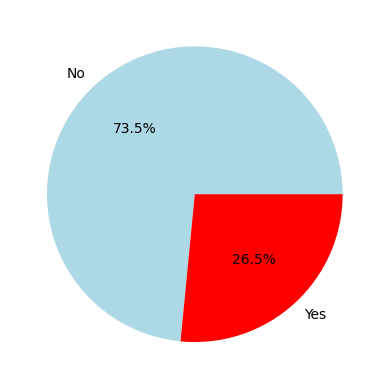

In [19]:
#menampilkan visualisasi distribusi Label agar lebih mudah dilihat

plt.pie(df.Churn.value_counts(),
		labels=df.Churn.value_counts().index,
		autopct='%.1f%%',
        colors=['lightblue', 'red'])
plt.show()

> Yes : pelanggan tidak lagi menggunakan produk layanan <br>
> No  : pelanggan tetap menggunakan produk layanan 

Dari pie chart di atas dapat saya lihat bahwa dataset berisi `Imbalance` antara data Churn dan Non-Churn. Data Non-Churn lebih banyak hampir 3 kali lipat dibandingkan data Churn. 

## Analytics

### Categorical Data

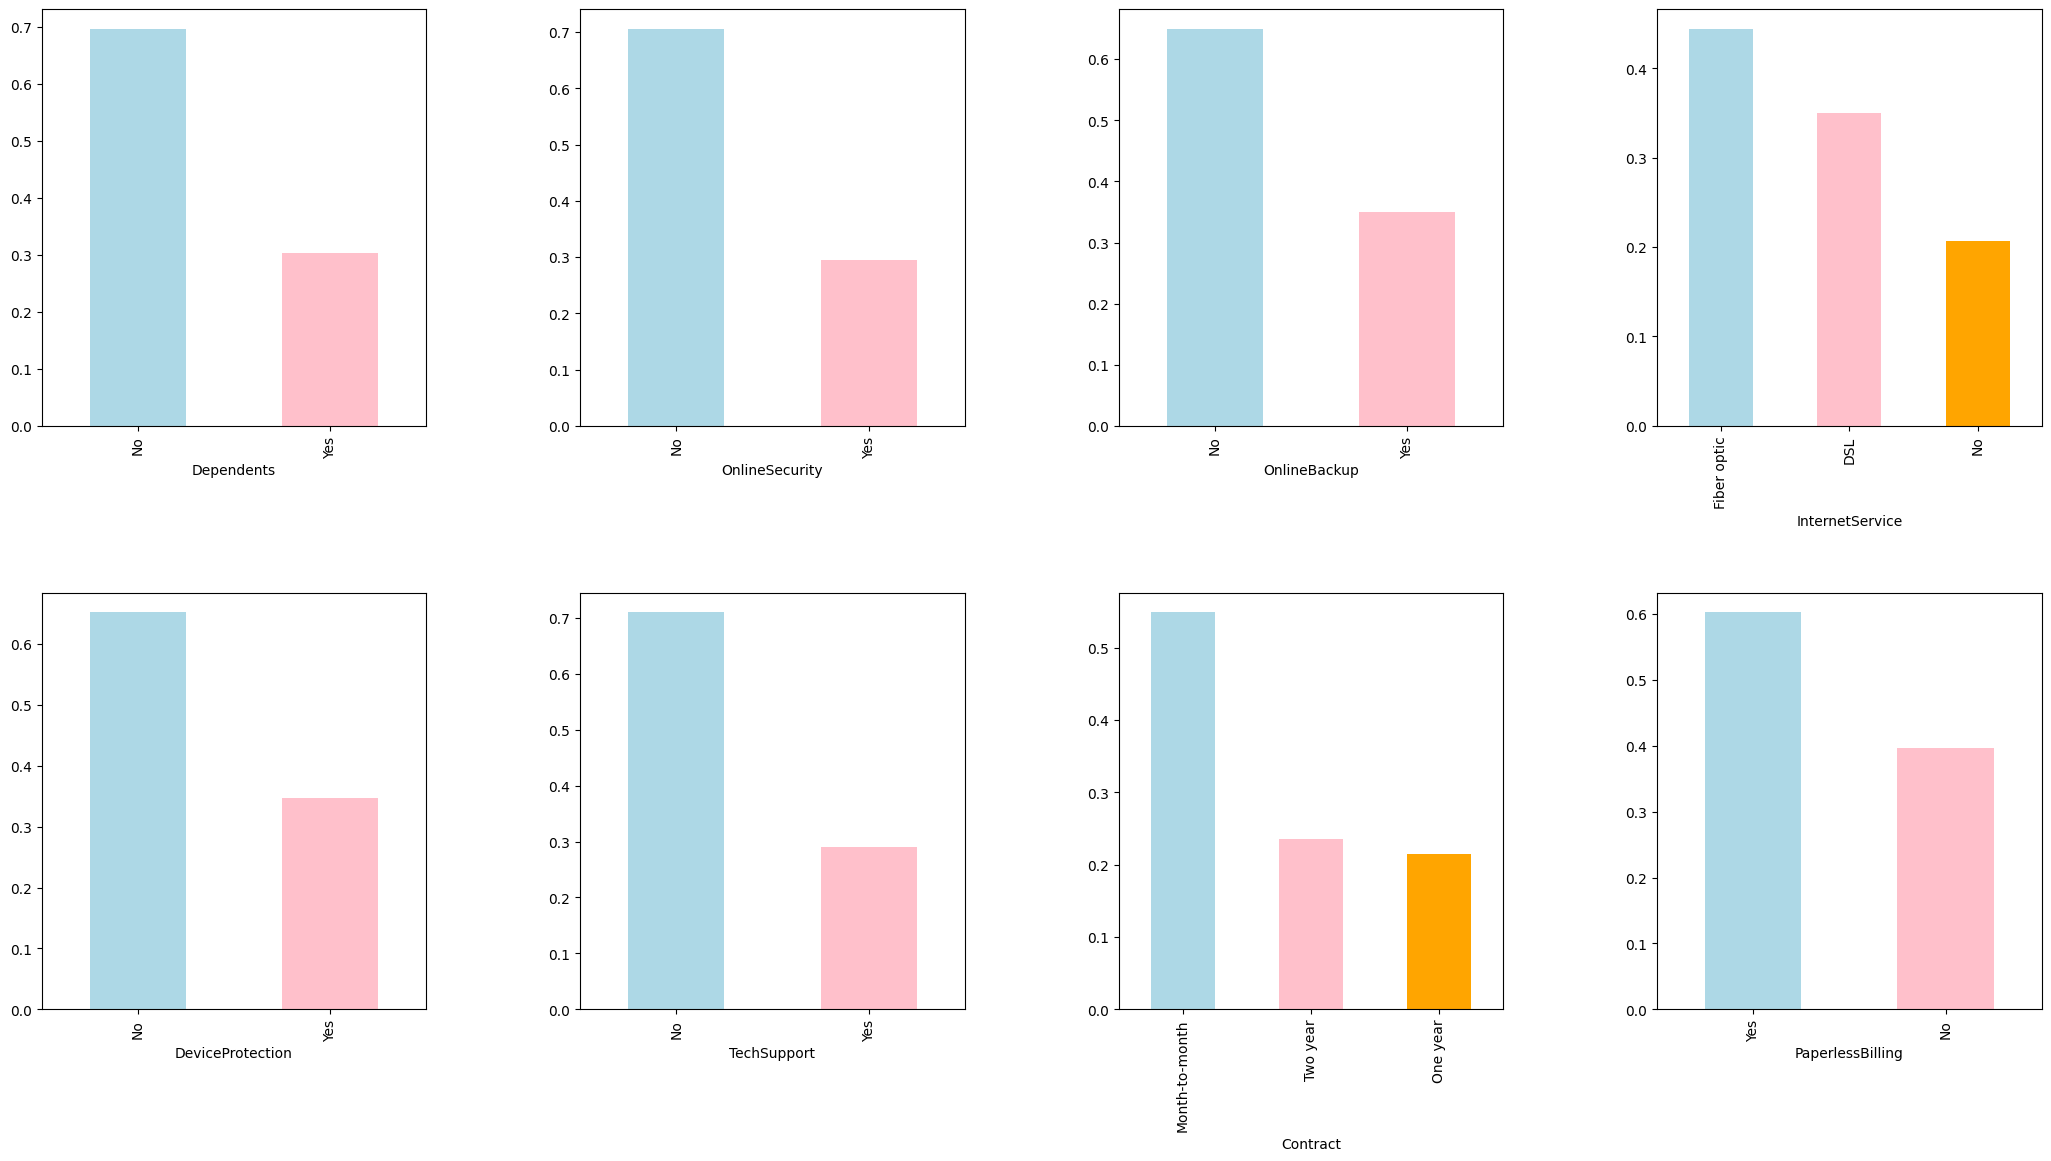

In [20]:
df_cat = df.select_dtypes(include='object').columns
bar_color = ['lightblue', 'pink', 'orange']
visual_categories =plt.figure(figsize=(10,10))
for i in range(8):
    visual_categories.add_subplot(2,4,i+1)
    df[df_cat[i]].value_counts(normalize=True).plot(kind='bar', color = bar_color)
plt.subplots_adjust(left=3,right=5,top=3,bottom=2,wspace = 0.4,hspace = 0.4)

Kumpulan grafik di atas bertujuan untuk menunjukkan gambaran pelanggan secara keseluruhan berdasarkan informasi akun maupun fasilitas layanan yang digunakan. <br>

***`Key Takeaways`*** dari visualisasi di atas, sebagai berikut:

> 1. Mayoritas pelanggan tidak memiliki tanggungan.
> 1. Mayoritas pelanggan melakukan *subsription* dengan paket per bulan, sangat signifikan bedanya dengan paket Satu Tahun maupun Dua Tahun.
> 1. Mayoritas pelanggan menggunakan Paperless Billing atau tagihan daring.
> 1. Layanan internet dengan Fiber Optic adalah yang paling diminati, tetapi tidak jauh signifikan bedanya dengan DSL.
> 1. Mayoritas pelanggan tidak memanfaatkan fasilitas layanan Online Security, Online Back Up, Device Protection, dan Tech Support.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

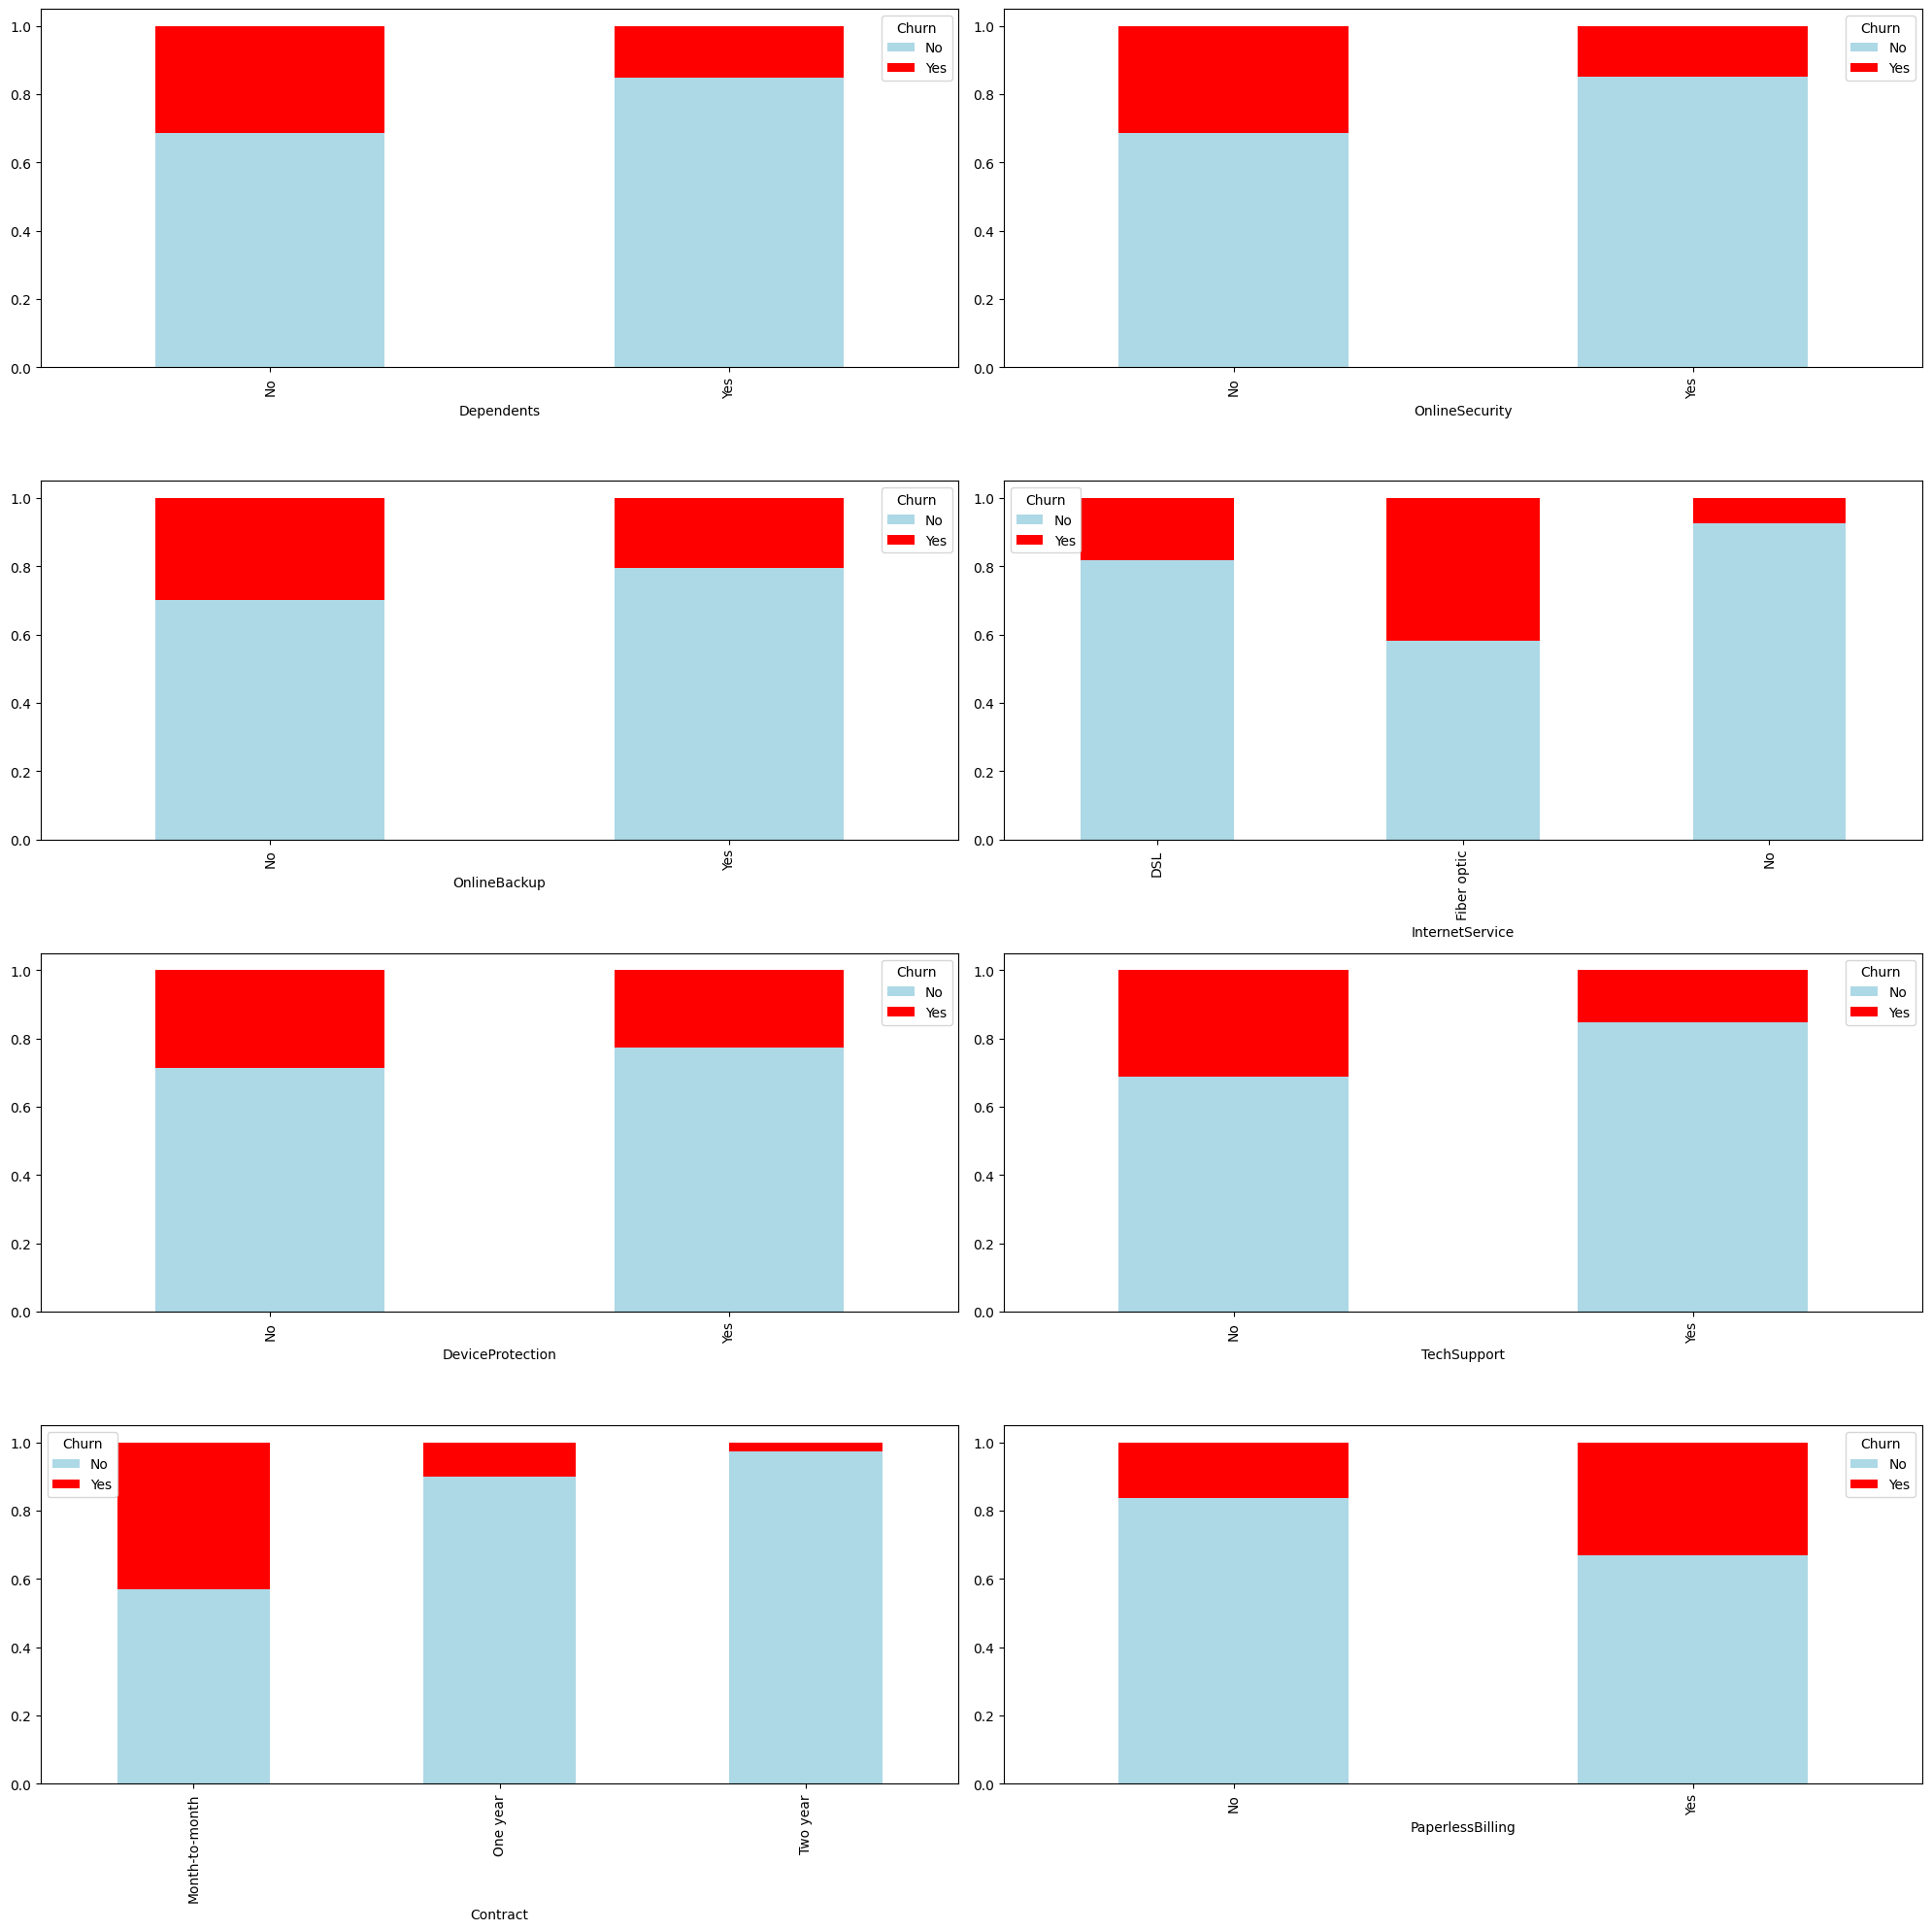

In [21]:
count = 0
fig = plt.figure(figsize=(20,20))

for i in df.drop(columns=['Churn', 'tenure', 'MonthlyCharges']).columns:
    count +=1
    ax= plt.subplot(4,2,count)
    pd.crosstab(df[i],df['Churn'],normalize=0).plot(kind='bar',stacked=True,ax=ax, color = ['lightblue', 'red'])
    fig.tight_layout()

plt.show()

Kumpulan grafik di atas bertujuan untuk menunjukkan gambaran pelanggan yang sudah dikaitkan dengan `Churn` maupun `Non-Churn`. <br>

***`Key Takeaways`*** dari visualisasi di atas, sebagai berikut:

> 1. Menariknya, pelanggan yang tidak memiliki tanggungan justru Churn lebih banyak daripada yang memiliki tanggungan.
> 1. Pelanggan yang menggunakan layanan internet dengan Fiber Optic lebih banyak yang Churn daripada yang menggunakan DSL maupun yang tidak menggunakan layanan internet sama sekali. 
> 1. Pelanggan dengan paket bulanan *(month-to-month)* signifikan Churn lebih banyak dibandingkan paket tahunan maupun paket 2 tahun. 
> 1. Pelanggan yang menggunakan Paperless Billing lebih banyak yang Churn daripada yang non-Paperless Billing.
> 1. Pelanggan yang tidak menggunakan fasilitas layanan Online Security, Online Back Up, Device Protection, dan Tech Support lebih banyak yang Churn dibandingkan dengan pelanggan yang menggunakan layanan tersebut.

### Numerical Data

Di atas sudah menggambarkan data kategorikal, selanjutnya akan dijabarkan data numerik yaitu `Tenure` dan `MonthlyCharges`. 

In [22]:
print('Total tagihan semua pelanggan : $', (df['MonthlyCharges'].sum()))
print('Total tagihan pelanggan yang Churn : $', round(df[df['Churn'] == 'Yes']['MonthlyCharges'].sum()))
print('Proporsi total tagihan pelanggan yang Churn dari seluruh pelanggan :', round((df[df['Churn'] == 'Yes']['MonthlyCharges'].sum())/(df['MonthlyCharges'].sum())*100, 2), '%')

Total tagihan semua pelanggan : $ 317005.45
Total tagihan pelanggan yang Churn : $ 96532
Proporsi total tagihan pelanggan yang Churn dari seluruh pelanggan : 30.45 %


> Dari data yang tersedia, ditemukan fakta bahwa dari total tagihan bulanan, **30% atau setara dengan 96 ribu dollar pendapatan perusahaan telah hilang** karena pelanggan memutuskan untuk berhenti menggunakan layanan. 

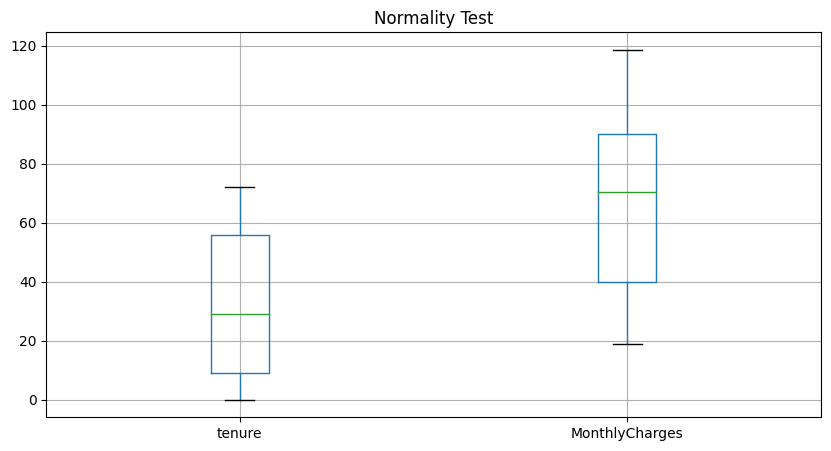

In [23]:
df[['tenure', 'MonthlyCharges']].boxplot(figsize=(10, 5))
plt.title('Normality Test')
plt.show()

Untuk kolom numerikal `Tenure` dan `MonthlyCharges`, distribusi data bersifat miring sehingga data diasumsikan tidak terdistribusi normal.<br> Kedua variabel tidak memiliki outlier sama sekali.

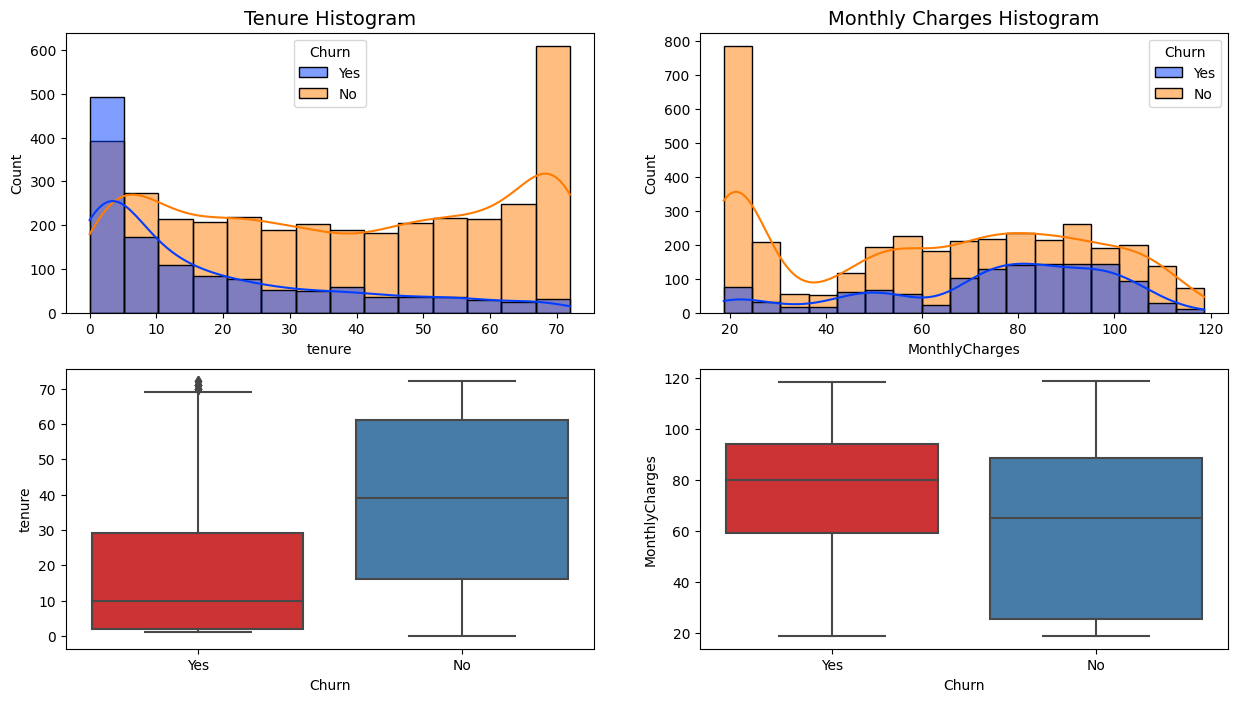

In [24]:
plt.figure(figsize=(15,8))

plt.subplot(221)
sns.histplot(data=df,x='tenure',hue='Churn', kde=True, palette='bright')
plt.title('Tenure Histogram',fontsize=14)

plt.subplot(222)
sns.histplot(data=df,x='MonthlyCharges',hue='Churn',kde=True, palette='bright')
plt.title('Monthly Charges Histogram',fontsize=14)

plt.subplot(223)
sns.boxplot(data=df,y='tenure', x='Churn', palette='Set1')

plt.subplot(224)
sns.boxplot(data=df,y='MonthlyCharges', x='Churn', palette='Set1')
plt.show()

Dari visualisasi di ata, ***key takeaways*** yang dapat diambil adalah: <br>
- semakin lama durasi berlangganan, justru semakin sedikit pelanggan yang Churn<br>
- semakin tinggi tagihan bulanan, pelanggan yang Churn semakin banyak pula <br>

Selain itu, terdapat *outlier* pada `Tenure` dengan data `Churn Yes`. Untuk melihat apakah outlier tersebut akan mengganggu atau tidak, mari kita lihat detail di bawah ini.  <br>


In [25]:
tenure_yes_churn = df[df['Churn'] == 'Yes']['tenure']

Q1 = tenure_yes_churn.describe()['25%']
Q3 = tenure_yes_churn.describe()['75%']
min = tenure_yes_churn.min()
max = tenure_yes_churn.max()
IQR = Q3 - Q1
print('IQR :', IQR, '\nMin :', min, '\nBatas minimum bawah :', Q1-(1.5*IQR), '\nMax :', max, '\nBatas maksimum atas :', Q3+(1.5*IQR), '\n')


print('Terdapat', df[(df['Churn'] == 'Yes') & (df['tenure'] > Q3+(1.5*IQR))].shape[0], 'data dengan data Tenure yang lebih tinggi dari batas maksimum atas.')


IQR : 27.0 
Min : 1 
Batas minimum bawah : -38.5 
Max : 72 
Batas maksimum atas : 69.5 

Terdapat 13 data dengan data Tenure yang lebih tinggi dari batas maksimum atas.


Dari detail data di atas, data *outlier* tersebut dapat diwajarkan karena ke-13 pelanggan tersebut sudah menggunakan produk layanan lebih lama dibandingkan mayoritas pelanggan lainnya. Sehingga data outlier ini tidak menjadi masalah untuk digunakan. 

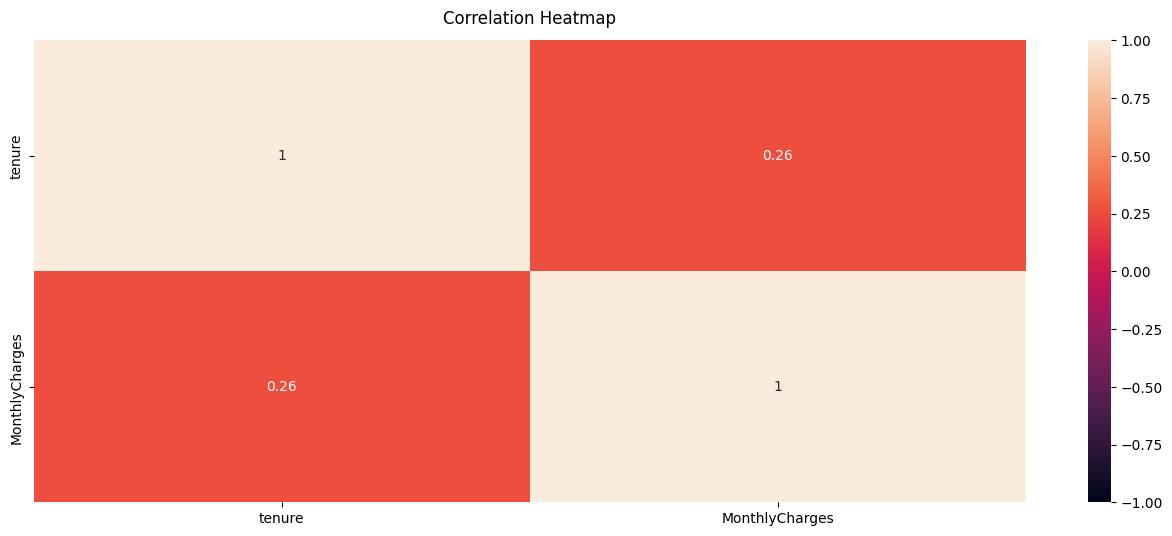

In [26]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df[['tenure', 'MonthlyCharges']].corr(method = 'spearman'), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

Dari uji korelasi di atas, dapat disimpulkan bahwa lamanya durasi berlangganan tidak ada hubungannya dengan tagihan bulanan.<br>
Hal ini sangat wajar karena tagihan bulanan itu bukan berdasarkan lamanya durasi layanan tetapi dihitung berdasarkan seluruh fasilitas layanan yang digunakan pelanggan. 

# **Data Modelling & Evaluation Metrics**

## **Features Selection**

Model akan terdiri dari dua tahap, yaitu model dengan: <br>
- [1] menggunakan variabel numerikal saja (Tenure & MonthlyCharges) <br>
- [2] menggunakan seluruh variabel (termasuk data kategorikal)

Seleksi ini dipilih karena mayoritas fitur kategorikal adalah jasa layanan yang digunakan oleh pelanggan dimana layanan-layanan tersebut direpresentasikan dengan total tagihan bulanan. Semakin banyak layanan yang digunakan, tentunya semakin besar pula tagihan yang harus dibayar oleh pelanggan. Fitur numerikal ini juga dipilih terlebih dahulu untuk melihat apakah cukup berhasil untuk membuat model. 

## **Using Only Numerical Features**

### **1. Logistic Regression**

Tahap pertama, data `Churn` akan saya ubah dulu menjadi 1 : Yes dan 0 : No

In [27]:
df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0})
df['Churn'] = df['Churn'].astype('int64')

In [28]:
features = ['tenure', 'MonthlyCharges']
target = 'Churn'

X = df[features]
y = df[target]

In [29]:
X.describe()

,tenure,MonthlyCharges
count,4853.000000,4853.000000
mean,32.679992,65.321543
std,24.395554,29.783655
min,0.000000,18.800000
25%,9.000000,40.050000
50%,29.000000,70.600000
75%,56.000000,90.050000
max,72.000000,118.650000


Sebelum melakukan modelling, akan saya cek terlebih dahulu Multikolinearitas antar variabel. 

#### **Test of Multicollinearity**

In [30]:
def calc_vif(X):
    vif = pd.DataFrame()
    vif['variable'] = X.columns
    vif['vif'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return vif

In [31]:
calc_vif(X)

<IPython.core.display.Javascript object>

,variable,vif
0,tenure,2.630097
1,MonthlyCharges,2.630097


Angka VIF pada kedua variabel tidak ada yang di atas 4 sehingga dapat disimpulkan bahwa tidak ada Independent Variables yang saling mempengaruhi satu sama lain secara signifikan. Hal ini juga menunjukkan bahwa model dapat dipercaya dan *reliable*.  <br>

In [32]:
model = sm.Logit(y, sm.add_constant(X))
result = model.fit()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Optimization terminated successfully.
         Current function value: 0.451759
         Iterations 7


#### **Stastistic Summary**

In [33]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 4853
Model:                          Logit   Df Residuals:                     4850
Method:                           MLE   Df Model:                            2
Date:                Mon, 29 May 2023   Pseudo R-squ.:                  0.2193
Time:                        23:23:23   Log-Likelihood:                -2192.4
converged:                       True   LL-Null:                       -2808.1
Covariance Type:            nonrobust   LLR p-value:                3.958e-268
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.7872      0.107    -16.770      0.000      -1.996      -1.578
tenure            -0.0554      0.002    -27.187      0.000      -0.059      -0.051
MonthlyCharges     0.0329      0.002

*OUTPUT*
<br>
> 1. LLR p-value : 0.000...3958 <br>
> <br>
> 2. p-value :
    <br> - const : 0.000
    <br> - tenure : 0.000
    <br> - MonthlyCharges : 0.000 <br>
> <br>
> 3. coef :
    <br> - tenure : -0.0554
    <br> - MonthlyCharges : 0.0329 <br>

#### **Model Interpretation and Limitations**

> 1. LLR p-value < 0.05 (Tolak H0). <br>
Artinya, minimal salah satu variabel berpengaruh secara signifikan terhadap Churn.<br>
> <br>
> 2. p-value : <br>
    <br> - const < 0.05 (Tolak H0) <br>
Artinya, model memerlukan *intercept*.<br>
    <br> - tenure  < 0.05 (Tolak H0) dan *coef* bernilai **minus**<br>
Artinya, lama durasi berlangganan berpengaruh secara negatif terhadap Churn. Semakin lama durasi berlangganan, kemungkinan Churn justru semakin kecil. <br>
Berlaku untuk lama durasi berlangganan 0 bulan sampai 72 bulan.<br>
    <br> - MonthlyCharges < 0.05 (Tolak H0) dan *coef* bernilai **plus** <br>
    Artinya, nominal tagihan bulanan berpengaruh secara positif terhadap Churn. Semakin besar nominal tagihan bulanan, kemungkinan Churn pun semakin tinggi. <br>
Berlaku untuk tagihan bulanan dengan nominal $18.8 sampai dengan $118.65.<br>

#### **Building Predictive Model**

Berikut akan saya buat contoh prediksi dari model yang telah dibuat, mengacu pada formula
> **coef --> OR exp(beta(c-a))**

In [34]:
c1 = 24
a1 = 12

OR_tenure = np.exp(0.0556*(c1-a1))
print(OR_tenure)

<IPython.core.display.Javascript object>

1.948773109603555


Dari predictive model di atas dapat disimpulkan bahwa: <br>

> Ketika lama durasi berlangganan meningkat 12 bulan, kemungkinan Churn akan menurun 1.95 kali lipat. <br>
> **Dengan catatan, nilai variabel lain tidak berubah.**

In [35]:
c2 = 50
a2 = 30

OR_MonthlyCharges = np.exp(0.0329*(c2-a2))
print(OR_MonthlyCharges)

<IPython.core.display.Javascript object>

1.9309266167394623


Dari predictive model di atas dapat disimpulkan bahwa: <br>

> Ketika nominal tagihan bulanan meningkat $20, kemungkinan Churn akan meningkat pula sebesar 1.93 kali lipat. <br>
> **Dengan catatan, nilai variabel lain tidak berubah.**

#### **Data Splitting & Training**

In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.2,
    random_state = 7,
    stratify=y # karena data Imbalance
)

In [37]:
sm_Logit_train = sm.Logit(y_train, sm.add_constant(X_train))
result_train = sm_Logit_train.fit()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Optimization terminated successfully.
         Current function value: 0.451188
         Iterations 7


In [38]:
y_prob = result_train.predict(sm.add_constant(X_test)) # risiko Churn
y_class = np.where(y_prob > 0.5, 1, 0) # kelas churn / non churn

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### **Evaluation Metric**

##### **Confusion Matrix**

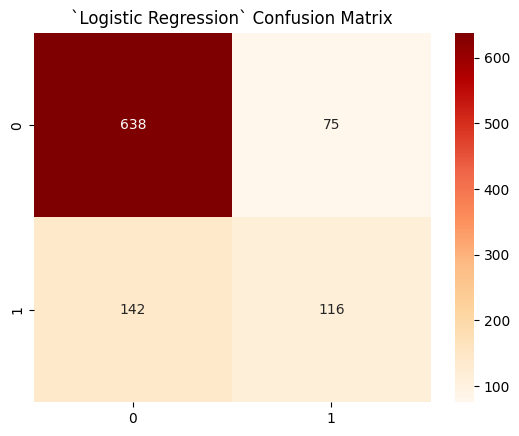

In [39]:
cfm = confusion_matrix(y_test, y_class)
sns.heatmap(cfm, annot=True,fmt = "d", cmap='OrRd')
plt.title("`Logistic Regression` Confusion Matrix");

Saya menggunakan `Confusion Matrix` karena dataset ini **Imbalance** antara data Churn dan Non-Churn. Jika data **Balance**, model dapat dievaluasi menggunakan `Accuracy Score`. Jika *Imbalance Data* menggunakan Accuracy Score, hasil evaluasinya kurang valid dan reliable untuk digunakan. <br><br>

> **Dari matrix di atas, model Logistic Regression yang dibuat dapat mendeteksi 754 data secara tepat (TP dan TN) tetapi salah mendeteksi 217 data lainnya (FP dan FN).**

<br><br>
Selanjutnya, akan dilakukan evaluation metric kedua yaitu `Recall`.<br>
Recall dipilih karena dalam konteks Telco Churn ini, yang kritikal adalah **`FALSE NEGATIVE`**. <br>
Pelanggan yang terdeteksi akan Churn akan diberikan perlakuan khusus untuk mencegah pelanggan itu benar-benar Churn. <br>
- **`[FALSE POSITIVE]`** Pelanggan yang terdeteksi Churn padahal sebenarnya tidak Churn ***diberikan perlakuan khusus*** --> tidak akan berakibat fatal bagi pelanggan <br>
- **`[FALSE NEGATIVE]`** Pelanggan yang terdeteksi tidak akan Churn padahal sebenarnya akan Churn ***tidak diberikan perlakuan khusus*** --> berakibat fatal bagi pelanggan untuk benar-benar Churn

##### **Recall**

In [40]:
print(classification_report(y_test, y_class))


recall_lr = recall_score(y_test, y_class)
print("Recall:", round(recall_lr*100, 2), '%')

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       713
           1       0.61      0.45      0.52       258

    accuracy                           0.78       971
   macro avg       0.71      0.67      0.69       971
weighted avg       0.76      0.78      0.76       971

Recall: 44.96 %


> **Dari hasil *Recall* di atas, dapat disimpulkan model hanya bisa mengidentifikasi sekitar 44.96% pelanggan yang Churn.** <br>
> Ibaratnya, dari 100 pelanggan yang sebenarnya akan Churn, hanya 44 pelanggan yang terdeteksi akan Churn oleh model.

### **2. KNN**

<Axes: xlabel='tenure', ylabel='MonthlyCharges'>

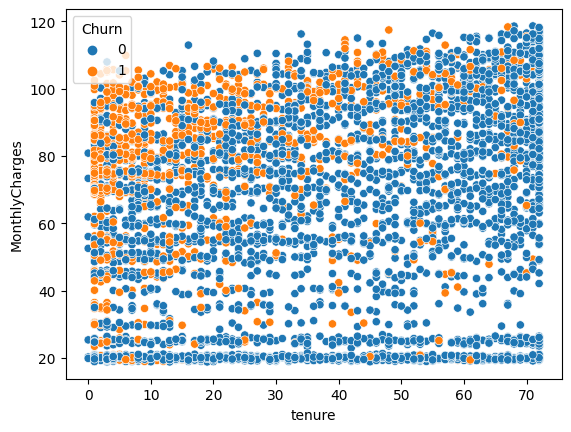

In [41]:
sns.scatterplot(x = 'tenure', y = 'MonthlyCharges', hue = 'Churn', data = df)

Dari visualisasi di atas, dapat dilihat bahwa data Tenure dan MonthlyCharges sangat tersebar, tidak berpola, dan tidak ada hubungan linear antara kedua variabel tersebut. 

#### **Feature Engineering**

Menggunakan `MinMaxScaler` karena variabel numerik. 

In [42]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [43]:
display(X_train)
print(X_train_scaled)

,tenure,MonthlyCharges
229,67,67.85
3238,1,25.15
1650,65,59.80
1177,2,76.50
920,46,19.20
...,...,...
2029,64,96.90
4593,72,108.10
1783,24,96.00
2657,8,49.55


[[0.93055556 0.49123686]
 [0.01388889 0.06359539]
 [0.90277778 0.41061592]
 ...
 [0.33333333 0.77315974]
 [0.11111111 0.30796194]
 [0.13888889 0.51427141]]


#### **KNN Without Scaling**

In [44]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [45]:
y_pred_class = knn.predict(X_test)

In [46]:
print(classification_report(y_test, y_pred_class))


recall_knn = recall_score(y_test, y_pred_class)
print("Recall:", round(recall_knn*100, 2), '%')

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       713
           1       0.61      0.45      0.52       258

    accuracy                           0.78       971
   macro avg       0.71      0.67      0.69       971
weighted avg       0.76      0.78      0.77       971

Recall: 45.35 %


> **Dari hasil *Recall* di atas, dapat disimpulkan model hanya bisa mengidentifikasi sekitar 45.35% pelanggan yang Churn.** <br>
> Ibaratnya, dari 100 pelanggan yang sebenarnya akan Churn, hanya 45 pelanggan yang terdeteksi akan Churn oleh model.

#### **KNN With Scaling**

In [47]:
knn_scaled = KNeighborsClassifier(n_neighbors=7)
knn_scaled.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=7)

In [48]:
y_pred_class_scaled = knn_scaled.predict(X_test_scaled)

In [49]:
print(classification_report(y_test, y_pred_class_scaled))


recall_knn_scaled = recall_score(y_test, y_pred_class_scaled)
print("Recall:", round(recall_knn_scaled*100, 2), '%')

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       713
           1       0.60      0.47      0.53       258

    accuracy                           0.78       971
   macro avg       0.71      0.68      0.69       971
weighted avg       0.76      0.78      0.77       971

Recall: 46.9 %


> **Dari hasil *Recall* di atas, dapat disimpulkan model hanya bisa mengidentifikasi sekitar 46.9% pelanggan yang Churn.** <br>
> Ibaratnya, dari 100 pelanggan yang sebenarnya akan Churn, hanya 46 pelanggan yang terdeteksi akan Churn oleh model.

#### **Choose The Right Value of K**

In [50]:
k = range(1,30,2)

test_accuracy = []
train_accuracy = []
score = 0

for i in k:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled, y_train)

    y_pred_train = knn.predict(X_train_scaled)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    train_accuracy.append(accuracy_train)

    y_pred_test = knn.predict(X_test_scaled)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    test_accuracy.append(accuracy_test)

    if score < accuracy_test:
        score = accuracy_test
        best_k = i

In [51]:
print('Faktor K terbaik ', best_k)
print('Score', score)

Faktor K terbaik  25
Score 0.7857878475798146


<Axes: >

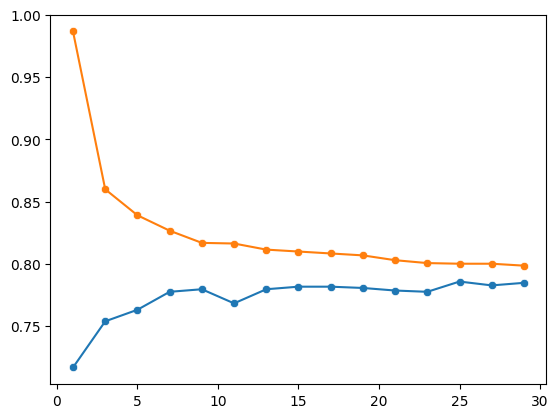

In [52]:
sns.lineplot(x = k, y = test_accuracy)
sns.scatterplot(x = k, y = test_accuracy)

sns.lineplot(x = k, y = train_accuracy)
sns.scatterplot(x = k, y = train_accuracy)

> **Dari pencarian faktor K terbaik, berarti jumlah tetangga terdekat yang optimal untuk dipertimbangkan dalam membuat prediksi adalah 25.** <br>

### **3. Decision Tree**

In [53]:
tree = DecisionTreeClassifier(
    max_depth=2,
    criterion='entropy'
)

In [54]:
tree_gini = DecisionTreeClassifier(
    max_depth=2,
    criterion='gini'
)

In [55]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [56]:
y_pred_class_tree = tree.predict(X_test)

In [57]:
print(classification_report(y_test, y_pred_class_tree))


recall_dt = recall_score(y_test, y_pred_class_tree)
print("Recall:", round(recall_dt*100, 2), '%')

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       713
           1       0.65      0.40      0.50       258

    accuracy                           0.78       971
   macro avg       0.73      0.66      0.68       971
weighted avg       0.77      0.78      0.77       971

Recall: 40.31 %


> **Dari hasil *Recall* di atas, dapat disimpulkan model hanya bisa mengidentifikasi sekitar 40.31% pelanggan yang Churn.** <br>
> Ibaratnya, dari 100 pelanggan yang sebenarnya akan Churn, hanya 40 pelanggan yang terdeteksi akan Churn oleh model.

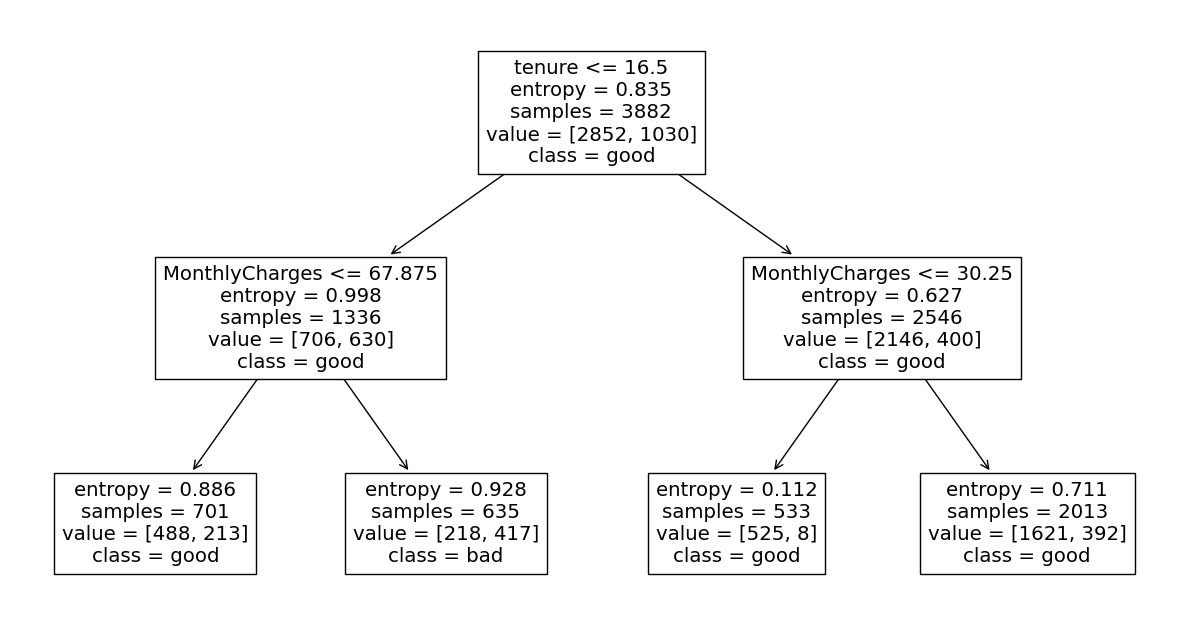

In [58]:
plt.figure(figsize = (15,8))
plot_tree(tree, feature_names = list(X), class_names = ['good', 'bad'])
plt.show()

1. Tenure <= 16.5 dan MonthlyCharges <= $67.875 --> good
2. Tenure <= 16.5 dan MonthlyCharges > $67.875 --> bad

3. Tenure > 16.5 dan MonthlyCharges <= $30.075 --> good
4. Tenure > 16.5 dan MonthlyCharges > $30.075 --> good

In [59]:
tree_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

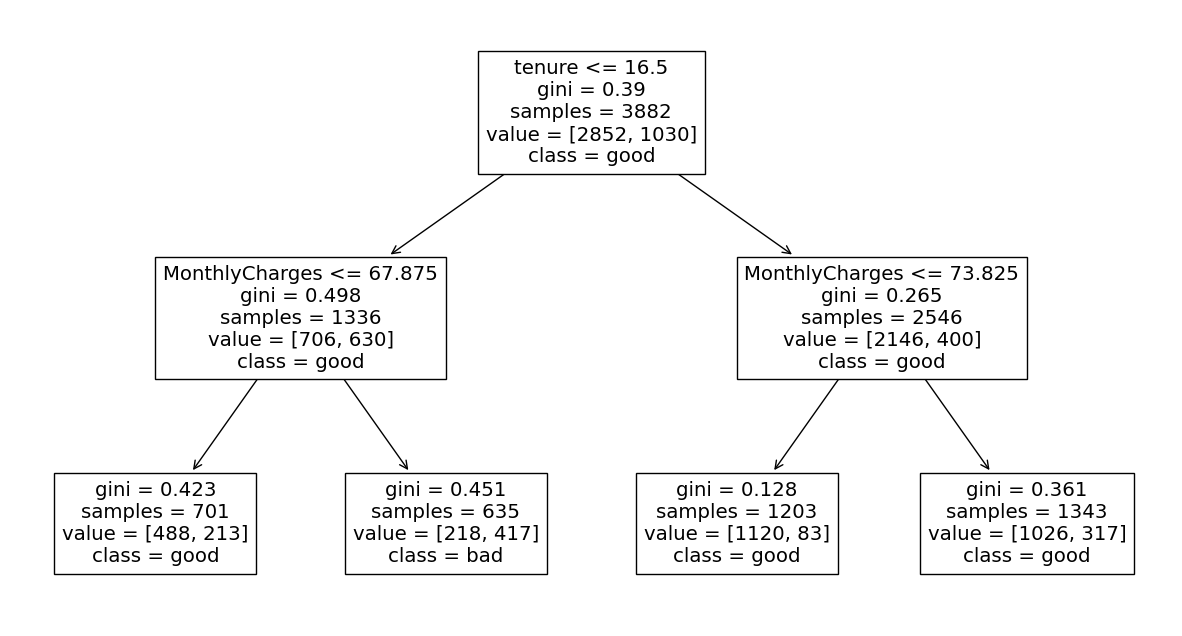

In [60]:
plt.figure(figsize = (15,8))
plot_tree(tree_gini, feature_names = list(X), class_names = ['good', 'bad'])
plt.show()

In [61]:
param_grid = {'max_depth': [3, 5, 7, 10]}
tree = DecisionTreeClassifier()

grid_search = GridSearchCV(tree, param_grid, cv=5)
grid_search.fit(X, y)  

# mencari parameter terbaik
best_maxdepth = grid_search.best_params_['max_depth']
print("Kedalaman pohon terbaik:", best_maxdepth)

Kedalaman pohon terbaik: 5


### **4. Random Forest**

In [62]:
model = make_pipeline(RandomForestClassifier())
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

Text(0.5, 1.0, '`Random Forest` Confusion Matrix')

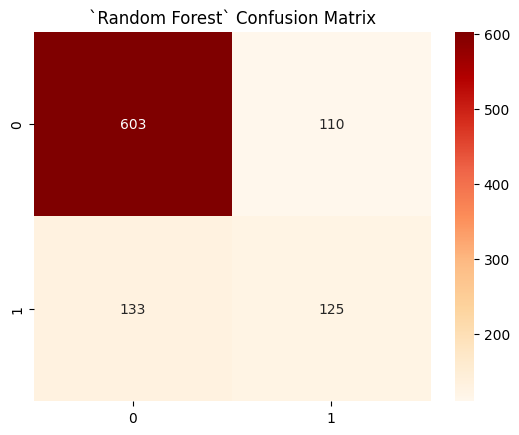

In [63]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix , annot=True,fmt = "d", cmap='OrRd')
plt.title("`Random Forest` Confusion Matrix")

In [64]:
print(classification_report(y_test, y_pred_class_tree))


recall_rf = recall_score(y_test, y_pred_class_tree)
print("Recall:", round(recall_rf*100, 2), '%')

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       713
           1       0.65      0.40      0.50       258

    accuracy                           0.78       971
   macro avg       0.73      0.66      0.68       971
weighted avg       0.77      0.78      0.77       971

Recall: 40.31 %


> **Dari hasil *Recall* di atas, dapat disimpulkan model hanya bisa mengidentifikasi sekitar 40.31% pelanggan yang Churn.** <br>
> Ibaratnya, dari 100 pelanggan yang sebenarnya akan Churn, hanya 40 pelanggan yang terdeteksi akan Churn oleh model.

In [65]:
rf = RandomForestClassifier()

param_grid = {
    'n_estimators': [50, 100, 150, 200]  # Specify the values to be searched
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search.fit(X, y)

# mencari parameter terbaik
best_n_estimators = grid_search.best_params_['n_estimators']
print("n_estimators terbaik :", best_n_estimators)

n_estimators terbaik : 150


Text(0.5, 1.0, '`Random Forest` Confusion Matrix')

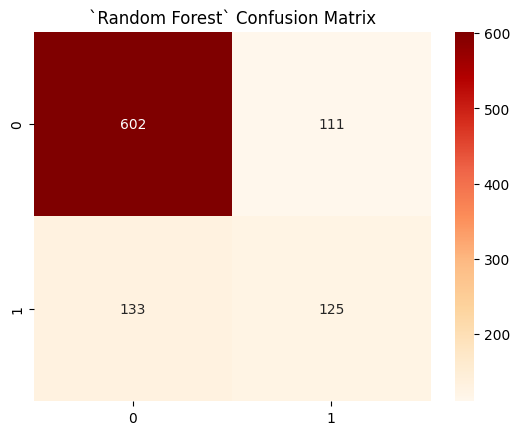

In [66]:
model = make_pipeline(RandomForestClassifier(n_estimators=50))
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix , annot=True,fmt = "d", cmap='OrRd')
plt.title("`Random Forest` Confusion Matrix")

In [67]:
print(classification_report(y_test, y_pred_class_tree))


recall_rf = recall_score(y_test, y_pred_class_tree)
print("Recall:", round(recall_rf*100, 2), '%')

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       713
           1       0.65      0.40      0.50       258

    accuracy                           0.78       971
   macro avg       0.73      0.66      0.68       971
weighted avg       0.77      0.78      0.77       971

Recall: 40.31 %


> **Dengan n_estimator terbaik pun, performa model masih tidak meningkat secara signifikan.** <br>

### **5. SVM**

In [68]:
model.svm = SVC(kernel='linear') 
model.svm.fit(X_train,y_train)
y_pred_class_svm = model.svm.predict(X_test)
metrics.accuracy_score(y_test, y_pred_class_svm)

0.7816683831101957

Text(0.5, 1.0, '`SVM` Confusion Matrix')

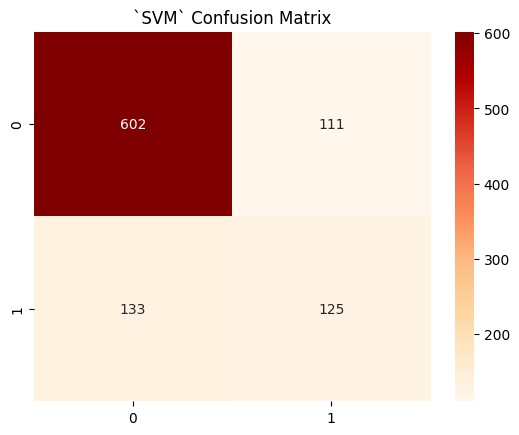

In [69]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix , annot=True,fmt = "d", cmap='OrRd')
plt.title("`SVM` Confusion Matrix")

In [70]:
print(classification_report(y_test, y_pred_class_svm))


recall_svm = recall_score(y_test, y_pred_class_svm)
print("Recall:", round(recall_svm*100, 2), '%')

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       713
           1       0.61      0.48      0.54       258

    accuracy                           0.78       971
   macro avg       0.72      0.69      0.70       971
weighted avg       0.77      0.78      0.77       971

Recall: 48.06 %


> **Dari hasil *Recall* di atas, dapat disimpulkan model hanya bisa mengidentifikasi sekitar 48.06% pelanggan yang Churn.** <br>
> Ibaratnya, dari 100 pelanggan yang sebenarnya akan Churn, hanya 48 pelanggan yang terdeteksi akan Churn oleh model.

## **Using All Features**

Sebelum membuat model, akan dilakukan Feature Engineering Actions pada setiap variabel untuk mengoptimalkan performa model machine learning dengan model input yang lebih relevan dan informatif. <br>

**Feature Engineering Actions**

**One-Hot Encoding**
> - `Dependents`
> - `PaperlessBilling`
> - `OnlineSecurity`
> - `OnlineBackup`
> - `InternetService`
> - `DeviceProtection`
> - `TechSupport`
> - `Contract`

**MinMax Scaler**
> - `tenure`
> - `MonthlyCharges`

`One-Hot Encoding` digunakan untuk data kategorikal yang bersifat nominal, antara satu nilai dengan yang lainnya tidak ada urutan atau tidak ada tingkatan yang lebih tinggi. <br>
`Minmax Scaler` digunakan untuk data numerik dengan mengubah rentang nilai menjadi antara 0 sampai 1 saja. Hal ini bertujuan untuk menyamakan skala antara data numerik. Jika dua variabel numerik yang memiliki rentang angka yang terlalu jauh akan menyebabkan variabel dengan rentang nilai yang lebih kecil memiliki kontribusi yang lebih rendah dalam proses pembelajaran dan dapat mengurangi kualitas dan kinerja model.

In [71]:
features_ohe = ['Dependents', 'OnlineSecurity', 'OnlineBackup', 'InternetService', 'DeviceProtection', 'TechSupport', 'PaperlessBilling', 'Contract']

df = pd.get_dummies(df, columns = features_ohe)

<IPython.core.display.Javascript object>

In [72]:
features_mms = ['tenure', 'MonthlyCharges']
df_features_mms = pd.DataFrame(df, columns = features_mms)
df_remaining_features = df.drop(columns = features_mms)

mms = MinMaxScaler()
rescaled_features = mms.fit_transform(df_features_mms)

df_rescaled_features = pd.DataFrame(rescaled_features, columns = features_mms, index=df_remaining_features.index)

df = pd.concat([df_remaining_features, df_rescaled_features], axis=1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [73]:
df

,Churn,Dependents_No,Dependents_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,...,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,PaperlessBilling_No,PaperlessBilling_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,tenure,MonthlyCharges
0,1,False,True,True,False,True,False,True,False,False,...,True,False,True,False,True,True,False,False,0.125000,0.541813
1,0,True,False,True,False,False,True,False,True,False,...,True,True,False,False,True,True,False,False,0.194444,0.639459
2,1,True,False,False,True,True,False,True,False,False,...,True,False,True,True,False,False,False,True,0.888889,0.290936
3,0,True,False,False,True,False,True,True,False,False,...,True,False,True,True,False,False,False,True,1.000000,0.509264
4,0,True,False,True,False,True,False,False,False,True,...,False,True,False,False,True,True,False,False,0.041667,0.048072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4925,0,True,False,True,False,True,False,False,True,False,...,True,False,True,False,True,True,False,False,0.208333,0.847772
4926,0,False,True,True,False,True,False,False,True,False,...,True,False,True,False,True,True,False,False,0.138889,0.724086
4927,0,True,False,True,False,True,False,False,False,True,...,False,True,False,True,False,False,False,True,0.805556,0.019529
4928,1,True,False,True,False,True,False,False,True,False,...,False,True,False,False,True,True,False,False,0.013889,0.510265


**Features & Label**

In [74]:
X = df.drop(columns = ['Churn'])
y = df['Churn']

**Data Splitting**

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 7, stratify=y)

In [76]:
print("Number of samples in X_train:", X_train.shape[0])
print("Number of samples in X_test:", X_test.shape[0])
print("Number of samples in y_train:", len(y_train))
print("Number of samples in y_test:", len(y_test))

Number of samples in X_train: 3882
Number of samples in X_test: 971
Number of samples in y_train: 3882
Number of samples in y_test: 971


### **1. Logistic Regression**

In [77]:
model = make_pipeline(LogisticRegression())
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Text(0.5, 1.0, '`Logistic Regression` Confusion Matrix')

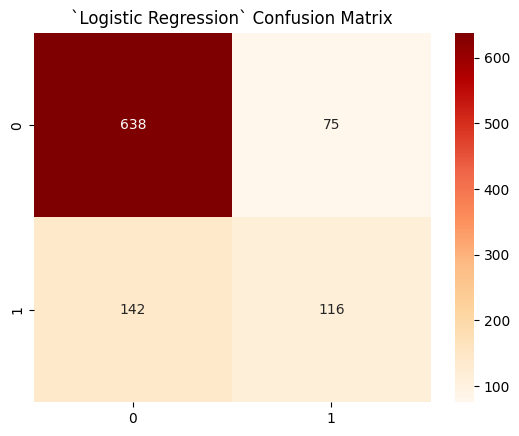

In [78]:
cfm = confusion_matrix(y_test, y_class)
sns.heatmap(cfm, annot=True,fmt = "d", cmap='OrRd')
plt.title("`Logistic Regression` Confusion Matrix")

In [79]:
print(classification_report(y_test, y_class))


recall_lr = recall_score(y_test, y_class)
print("Recall:", round(recall_lr*100, 2), '%')

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       713
           1       0.61      0.45      0.52       258

    accuracy                           0.78       971
   macro avg       0.71      0.67      0.69       971
weighted avg       0.76      0.78      0.76       971

Recall: 44.96 %


> **Dari hasil *Recall* di atas, dapat disimpulkan model hanya bisa mengidentifikasi sekitar 44.96% pelanggan yang Churn.** <br>
> Ibaratnya, dari 100 pelanggan yang sebenarnya akan Churn, hanya 44 pelanggan yang terdeteksi akan Churn oleh model.

### **2. KNN**

In [80]:
knn_scaled = KNeighborsClassifier(n_neighbors=25)
knn_scaled.fit(X_train_scaled, y_train)

y_pred_class_scaled = knn_scaled.predict(X_test_scaled)

Text(0.5, 1.0, '`KNN` Confusion Matrix')

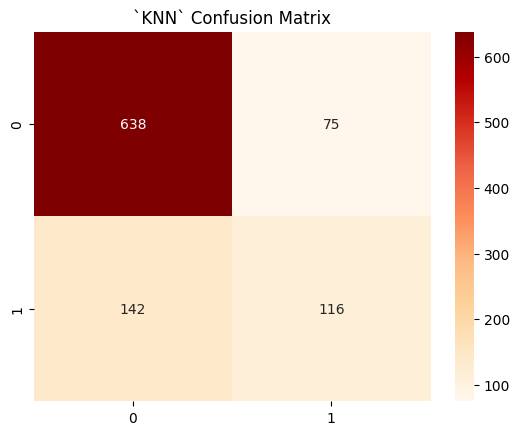

In [81]:
cfm = confusion_matrix(y_test, y_class)
sns.heatmap(cfm, annot=True,fmt = "d", cmap='OrRd')
plt.title("`KNN` Confusion Matrix")

In [82]:
print(classification_report(y_test, y_pred_class_scaled))

recall_knn_scaled = recall_score(y_test, y_pred_class_scaled)
print("Recall:", round(recall_knn_scaled*100, 2), '%')

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       713
           1       0.63      0.48      0.54       258

    accuracy                           0.79       971
   macro avg       0.73      0.69      0.70       971
weighted avg       0.77      0.79      0.78       971

Recall: 48.06 %


> **Dari hasil *Recall* di atas, dapat disimpulkan model hanya bisa mengidentifikasi sekitar 48.06% pelanggan yang Churn.** <br>
> Ibaratnya, dari 100 pelanggan yang sebenarnya akan Churn, hanya 48 pelanggan yang terdeteksi akan Churn oleh model.

In [83]:
k = range(1,30,2)

test_accuracy = []
train_accuracy = []
score = 0

for i in k:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled, y_train)

    y_pred_train = knn.predict(X_train_scaled)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    train_accuracy.append(accuracy_train)

    y_pred_test = knn.predict(X_test_scaled)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    test_accuracy.append(accuracy_test)

    if score < accuracy_test:
        score = accuracy_test
        best_k = i

In [84]:
print('Faktor K terbaik ', best_k)
print('Score', score)

Faktor K terbaik  25
Score 0.7857878475798146


### **3. Decision Tree**

In [85]:
tree = DecisionTreeClassifier(
    max_depth=2,
    criterion='entropy'
)

tree.fit(X_train, y_train)

y_pred_class_tree = tree.predict(X_test)

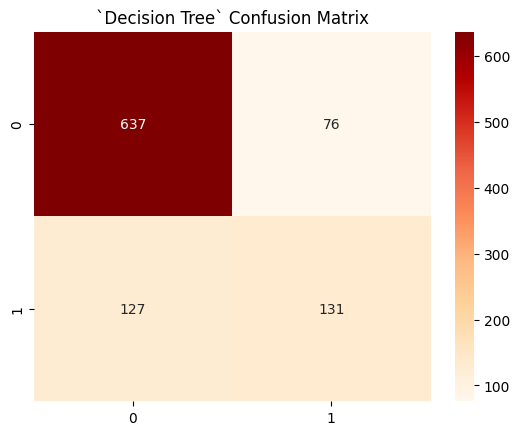

In [86]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix , annot=True,fmt = "d", cmap='OrRd')
plt.title("`Decision Tree` Confusion Matrix");

In [87]:
print(classification_report(y_test, y_pred_class_tree))

recall_tree = recall_score(y_test, y_pred_class_tree)
print("Recall:", round(recall_tree*100, 2), '%')

              precision    recall  f1-score   support

           0       0.86      0.81      0.84       713
           1       0.55      0.64      0.59       258

    accuracy                           0.77       971
   macro avg       0.71      0.73      0.71       971
weighted avg       0.78      0.77      0.77       971

Recall: 63.95 %


> **Dari hasil *Recall* di atas, dapat disimpulkan model hanya bisa mengidentifikasi sekitar 63.95% pelanggan yang Churn.** <br>
> Ibaratnya, dari 100 pelanggan yang sebenarnya akan Churn, hanya 64 pelanggan yang terdeteksi akan Churn oleh model.

In [88]:
param_grid = {'max_depth': [3, 5, 7, 10]}
tree = DecisionTreeClassifier()

grid_search = GridSearchCV(tree, param_grid, cv=5)
grid_search.fit(X, y)  

# mencari parameter terbaik
best_maxdepth = grid_search.best_params_['max_depth']
print("Kedalaman pohon terbaik:", best_maxdepth)

Kedalaman pohon terbaik: 3


### **4. Random Forest**

In [89]:
model = make_pipeline(RandomForestClassifier())
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

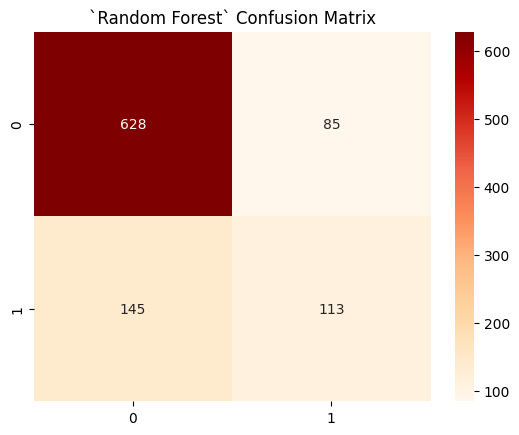

In [90]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix , annot=True,fmt = "d", cmap='OrRd')
plt.title("`Random Forest` Confusion Matrix");

In [91]:
print(classification_report(y_test, y_pred))

recall_rf2 = recall_score(y_test, y_pred)
print("Recall:", round(recall_rf2*100, 2), '%')

              precision    recall  f1-score   support

           0       0.81      0.88      0.85       713
           1       0.57      0.44      0.50       258

    accuracy                           0.76       971
   macro avg       0.69      0.66      0.67       971
weighted avg       0.75      0.76      0.75       971

Recall: 43.8 %


> **Dari hasil *Recall* di atas, dapat disimpulkan model hanya bisa mengidentifikasi sekitar 45.74% pelanggan yang Churn.** <br>
> Ibaratnya, dari 100 pelanggan yang sebenarnya akan Churn, hanya 45 pelanggan yang terdeteksi akan Churn oleh model.

In [92]:
rf = RandomForestClassifier()

param_grid = {
    'n_estimators': [50, 100, 150, 200]  # Specify the values to be searched
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search.fit(X, y)

# mencari parameter terbaik
best_n_estimators = grid_search.best_params_['n_estimators']
print("n_estimators terbaik :", best_n_estimators)

n_estimators terbaik : 100


### **5. SVM**

              precision    recall  f1-score   support

           0       0.83      0.88      0.86       713
           1       0.61      0.50      0.55       258

    accuracy                           0.78       971
   macro avg       0.72      0.69      0.70       971
weighted avg       0.77      0.78      0.77       971

Recall: 49.61 %


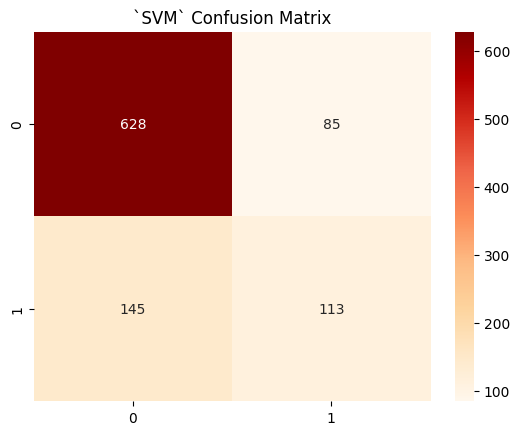

In [93]:
model.svm = SVC(kernel='linear') 
model.svm.fit(X_train,y_train)
y_pred_class_svm = model.svm.predict(X_test)
metrics.accuracy_score(y_test, y_pred_class_svm)

cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix , annot=True,fmt = "d", cmap='OrRd')
plt.title("`SVM` Confusion Matrix")

print(classification_report(y_test, y_pred_class_svm))


recall_svm = recall_score(y_test, y_pred_class_svm)
print("Recall:", round(recall_svm*100, 2), '%')

> **Dari hasil *Recall* di atas, dapat disimpulkan model hanya bisa mengidentifikasi sekitar 49.61% pelanggan yang Churn.** <br>
> Ibaratnya, dari 100 pelanggan yang sebenarnya akan Churn, hanya 49 pelanggan yang terdeteksi akan Churn oleh model.

## **Evaluation**

In [94]:
X = df.drop(columns = ['Churn'])
y = df['Churn']

In [95]:
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X,
    y,
    stratify = y,
    test_size = 0.2, 
    random_state = 7
)

### **Model Benchmark**

In [96]:
logreg = LogisticRegression(solver = 'liblinear', random_state=7)
knn = KNeighborsClassifier(n_neighbors = 25)
tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state = 7)
ranfor = RandomForestClassifier(n_estimators=200, random_state = 7)
svm = SVC(random_state = 7)

#### **Cross Validation**

In [97]:
skfold = StratifiedKFold(n_splits = 5)

<IPython.core.display.Javascript object>

##### **1. Cross Validation for Logistic Regression**

In [98]:
logreg_cv = cross_val_score(logreg, X_trainval, y_trainval, cv = skfold)

print('Hasil Cross Validasi :', logreg_cv)
print('Rata-rata skor validasi :', logreg_cv.mean())
print('Standar deviasi skor validasi :', logreg_cv.std())

<IPython.core.display.Javascript object>

Hasil Cross Validasi : [0.78893179 0.79407979 0.79510309 0.78994845 0.80283505]
Rata-rata skor validasi : 0.7941796361899455
Standar deviasi skor validasi : 0.004923855448819779


##### **2. Cross Validation for KNN**

In [99]:
knn_cv = cross_val_score(knn, X_trainval, y_trainval, cv = skfold)

print('Hasil Cross Validasi :', knn_cv)
print('Rata-rata skor validasi :', knn_cv.mean())
print('Standar deviasi skor validasi :', knn_cv.std())

<IPython.core.display.Javascript object>

Hasil Cross Validasi : [0.77606178 0.79407979 0.78221649 0.78350515 0.79896907]
Rata-rata skor validasi : 0.7869664583582109
Standar deviasi skor validasi : 0.008344065628656529


##### **3. Cross Validation for Decision Tree**

In [100]:
tree_cv = cross_val_score(tree, X_trainval, y_trainval, cv = skfold)

print('Hasil Cross Validasi :', tree_cv)
print('Rata-rata skor validasi :', tree_cv.mean())
print('Standar deviasi skor validasi :', tree_cv.std())

<IPython.core.display.Javascript object>

Hasil Cross Validasi : [0.78120978 0.7979408  0.78608247 0.77963918 0.78994845]
Rata-rata skor validasi : 0.7869641364486725
Standar deviasi skor validasi : 0.00658693001874551


##### **4. Cross Validation for Random Forest**

In [101]:
ranfor_cv = cross_val_score(ranfor, X_trainval, y_trainval, cv = skfold)

print('Hasil Cross Validasi :', ranfor_cv)
print('Rata-rata skor validasi :', ranfor_cv.mean())
print('Standar deviasi skor validasi :', ranfor_cv.std())

<IPython.core.display.Javascript object>

Hasil Cross Validasi : [0.77606178 0.78378378 0.7693299  0.78479381 0.75257732]
Rata-rata skor validasi : 0.773309318154679
Standar deviasi skor validasi : 0.011788432190593414


##### **5. Cross Validation for SVM**

In [102]:
svm_cv = cross_val_score(svm, X_trainval, y_trainval, cv = skfold)

print('Hasil Cross Validasi :', svm_cv)
print('Rata-rata skor validasi :', svm_cv.mean())
print('Standar deviasi skor validasi :', svm_cv.std())

<IPython.core.display.Javascript object>

Hasil Cross Validasi : [0.78764479 0.79150579 0.78737113 0.78608247 0.79123711]
Rata-rata skor validasi : 0.7887682601600127
Standar deviasi skor validasi : 0.0021916620278119333


Dari Cross Validation di atas, rata-rata skor validasi *Accuracy* kelima model memiliki angka yang relatif sama di sekitar 77-79%.<br>
Sesuai konteks bisnis, saya akan menghitung evaluasi Recall. 

#### **Recall**

In [103]:
def model_evaluation (model, metrics):
    skfold = StratifiedKFold(n_splits = 5)
    model_cv = cross_val_score(model, X_trainval, y_trainval, cv = skfold, scoring = metrics)

    print('Hasil Cross Validasi :', model_cv)
    print('Rata-rata skor validasi :', model_cv.mean())
    print('Standar deviasi skor validasi :', model_cv.std())

In [104]:
model_evaluation(logreg, 'recall')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Hasil Cross Validasi : [0.50970874 0.55339806 0.55339806 0.49029126 0.54368932]
Rata-rata skor validasi : 0.5300970873786408
Standar deviasi skor validasi : 0.025576582276348514


In [105]:
model_evaluation(knn, 'recall')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Hasil Cross Validasi : [0.50485437 0.54854369 0.53398058 0.49029126 0.50970874]
Rata-rata skor validasi : 0.5174757281553398
Standar deviasi skor validasi : 0.020958284606721257


In [106]:
model_evaluation(tree, 'recall')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Hasil Cross Validasi : [0.26213592 0.44174757 0.33495146 0.28640777 0.34951456]
Rata-rata skor validasi : 0.33495145631067963
Standar deviasi skor validasi : 0.06209039594298829


In [107]:
model_evaluation(ranfor, 'recall')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Hasil Cross Validasi : [0.49514563 0.52912621 0.51456311 0.47572816 0.41747573]
Rata-rata skor validasi : 0.48640776699029126
Standar deviasi skor validasi : 0.038883464843690846


In [108]:
model_evaluation(svm, 'recall')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Hasil Cross Validasi : [0.45145631 0.47572816 0.47572816 0.4368932  0.4368932 ]
Rata-rata skor validasi : 0.45533980582524275
Standar deviasi skor validasi : 0.01747572815533982


Dari kelima model di atas, rata-rata skor validasi beragam mulai dari 33% sampai 53%.<br>
Model yang memiliki evaluasi tertinggi adalah **`Logistic Regression`** walaupun memang skor model masih dianggap belum baik untuk digunakan. <br>
Oleh karena itu, saya akan mencoba melakukan *Tuning* untuk meningkatkan performa model. 

## **Hyperparameter Tuning**

Pertama, data akan di-split menjadi 60% training, 20% validasi, dan 20% test. 

In [109]:
X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, 
    y_trainval,
    test_size = 0.25,
    stratify = y_trainval,
    random_state = 7
)

In [110]:
hyperparam_c = [1000, 100, 10, 1, 0.1, 0.01, 0.001, 0.0001]
best_score = 0
val_score = []

for i in hyperparam_c:
    logreg = LogisticRegression(solver = 'liblinear', C = i)
    logreg.fit(X_train, y_train)

    y_pred_val = logreg.predict(X_val)
    score_tmp = recall_score(y_val, y_pred_val)

    if score_tmp > best_score:
        best_score = score_tmp
        best_param = i

In [111]:
print('Skor terbaik :', best_score)
print('Hyperparameter terbaik :', best_param)

Skor terbaik : 0.5697674418604651
Hyperparameter terbaik : 1000


### **Comparison Before vs After Tuning**

In [112]:
logreg_before = LogisticRegression(solver = 'liblinear', C = 1)
logreg_after = LogisticRegression(solver = 'liblinear', C = 1000)

In [113]:
logreg_before.fit(X_trainval, y_trainval)
y_pred = logreg_before.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       713
           1       0.63      0.51      0.56       258

    accuracy                           0.79       971
   macro avg       0.73      0.70      0.71       971
weighted avg       0.78      0.79      0.78       971



In [114]:
logreg_after.fit(X_trainval, y_trainval)
y_pred = logreg_after.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       713
           1       0.63      0.50      0.56       258

    accuracy                           0.79       971
   macro avg       0.73      0.70      0.71       971
weighted avg       0.78      0.79      0.78       971



Setelah dilakukan *Tuning* dan mencari hyperparameter terbaik, model yang semula memiliki evaluasi *Recall* 51% justru mengalami penurunan menjadi 50%. Oleh karena itu, dapat disimpulkan bahwa performa model belum berhasil ditingkatkan. 

### **Hyperparameter with Grid Search**

In [115]:
hyperparam_c = {
    'C' : [1000, 500, 100, 50, 10, 5, 1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001, 0.00005, 0.00001],
    'max_iter' : [100, 200, 300, 400, 500, 1000]
}

skfold = StratifiedKFold(n_splits = 5)
logreg = LogisticRegression(solver = 'liblinear', random_state = 7)

grid_search = GridSearchCV(
    logreg, 
    param_grid = hyperparam_c, 
    cv = skfold, 
    scoring = 'recall',
    n_jobs = -1
)

<IPython.core.display.Javascript object>

In [116]:
grid_search.fit(X_trainval, y_trainval)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(random_state=7, solver='liblinear'),
             n_jobs=-1,
             param_grid={'C': [1000, 500, 100, 50, 10, 5, 1, 0.5, 0.1, 0.05,
                               0.01, 0.005, 0.001, 0.0005, 0.0001, 5e-05,
                               1e-05],
                         'max_iter': [100, 200, 300, 400, 500, 1000]},
             scoring='recall')

In [117]:
grid_search.best_params_

{'C': 1, 'max_iter': 100}

In [118]:
grid_search.best_score_

0.5300970873786408

In [119]:
result_cv = pd.DataFrame(grid_search.cv_results_)
result_cv

<IPython.core.display.Javascript object>

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_max_iter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005646,0.000977,0.003666,0.001310,1000,100,"{'C': 1000, 'max_iter': 100}",0.504854,0.548544,0.553398,0.490291,0.538835,0.527184,0.025055,7
1,0.006571,0.002345,0.002340,0.001323,1000,200,"{'C': 1000, 'max_iter': 200}",0.504854,0.548544,0.553398,0.490291,0.538835,0.527184,0.025055,7
2,0.005629,0.001897,0.001333,0.000044,1000,300,"{'C': 1000, 'max_iter': 300}",0.504854,0.548544,0.553398,0.490291,0.538835,0.527184,0.025055,7
3,0.010621,0.005327,0.002810,0.001299,1000,400,"{'C': 1000, 'max_iter': 400}",0.504854,0.548544,0.553398,0.490291,0.538835,0.527184,0.025055,7
4,0.007838,0.002708,0.002879,0.001930,1000,500,"{'C': 1000, 'max_iter': 500}",0.504854,0.548544,0.553398,0.490291,0.538835,0.527184,0.025055,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,0.002346,0.000043,0.001191,0.000027,0.00001,200,"{'C': 1e-05, 'max_iter': 200}",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,73
98,0.002400,0.000036,0.001285,0.000085,0.00001,300,"{'C': 1e-05, 'max_iter': 300}",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,73
99,0.002645,0.000162,0.001251,0.000067,0.00001,400,"{'C': 1e-05, 'max_iter': 400}",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,73
100,0.002385,0.000086,0.001211,0.000040,0.00001,500,"{'C': 1e-05, 'max_iter': 500}",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,73


Karena C sebelum dan sesudah tuning sama-sama `1` maka akan ditunjukkan hasil akhir saja, sebagai berikut:


In [120]:
logreg_check = LogisticRegression(solver = 'liblinear', C = 1)

logreg_check.fit(X_trainval, y_trainval)
y_pred = logreg_check.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       713
           1       0.63      0.51      0.56       258

    accuracy                           0.79       971
   macro avg       0.73      0.70      0.71       971
weighted avg       0.78      0.79      0.78       971



Dengan GridSearchCV, model masih juga tidak berhasil ditingkatkan. Hasil evaluasi *Recall* masih 51% dan dapat dikatakan bahwa model masih tidak cukup reliabel untuk digunakan. <br><br>

Berbagai model sudah digunakan, sudah pula dilakukan tuning pada model, tetapi masih belum ada model yang cukup baik. Dari seluruh percobaan di atas, saya menemukan indikasi bahwa mungkin penyebabnya karena `Imbalanced Data`. Seperti yang sudah divisualisasikan, data Churn hanya 26.5% sedangkan sisanya 73.5% adalah data non-Churn. <br><br>
Oleh karena itu, saya akan menggunakan metode `SMOTE` (Synthetic Minority Over-sampling Technique) yang merupakan sebuah metode *oversampling* yang digunakan dalam pemodelan machine learning untuk menangani dataset yang tidak seimbang. Metode ini secara acak memilih dua atau lebih sampel dari kelas minoritas yang serupa dan membuat sampel sintetis baru di antara mereka dengan menggabungkan atribut-atribut dari sampel-sampel tersebut. Dengan demikian, SMOTE dapat membantu meningkatkan jumlah sampel dalam kelas minoritas sehingga mengurangi ketidakseimbangan kelas dalam dataset.

### **Using SMOTE**

In [121]:
smote = SMOTE()

X_resampled, y_resampled = smote.fit_resample(X, y)

In [122]:
print("Number of samples in X_train:", X_resampled.shape[0])
print("Number of samples in X_test:", y_test.shape[0])
print("Number of samples in y_train:", len(y_resampled))
print("Number of samples in y_test:", len(y_test))

Number of samples in X_train: 7130
Number of samples in X_test: 971
Number of samples in y_train: 7130
Number of samples in y_test: 971


Data di-split menjadi data training dan data test. Setelah dilakukan metode SMOTE, jumlah data set tetap sama, sedangkan jumlah data training yang semula 3882 bertambah menjadi 7130. Saya akan detailkan berdasarkan label Churn dan non-Churn, sebagai berikut:

In [123]:
print('Data Semula')
print(y_train.value_counts())
print('\n')
print('Data Setelah SMOTE')
print(y_resampled.value_counts())

Data Semula
Churn
0    2139
1     772
Name: count, dtype: int64


Data Setelah SMOTE
Churn
1    3565
0    3565
Name: count, dtype: int64


Dibandingkan data semula yang *imbalanced*, dataset yang baru sudah terdiri dari label Churn dan non-Churn yang seimbang. Sehingga model training memiliki lebih banyak *source* untuk mempelajari baik label 0 maupun 1, yang dapat berdampak pada peningkatan performa model. 

#### **1. Decision Tree**

In [124]:
param_grid = {
    'max_depth': [3, 5, 7, 9, 11],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
}

dt_classifier = DecisionTreeClassifier()

grid_search = GridSearchCV(dt_classifier, param_grid, cv=5)

grid_search.fit(X_resampled, y_resampled)

print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)


Best hyperparameters:  {'max_depth': 11, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best score:  0.7858345021037869


In [125]:
dt_classifier_gs = DecisionTreeClassifier(max_depth=11, min_samples_leaf=1, min_samples_split=2)

dt_classifier_gs.fit(X_resampled, y_resampled)

y_pred_tree_resample = dt_classifier_gs.predict(X_test)

report = classification_report(y_test, y_pred_tree_resample)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.86      0.90       713
           1       0.70      0.87      0.78       258

    accuracy                           0.87       971
   macro avg       0.82      0.87      0.84       971
weighted avg       0.88      0.87      0.87       971



Text(0.5, 1.0, '`Decision Tree GS` Confusion Matrix')

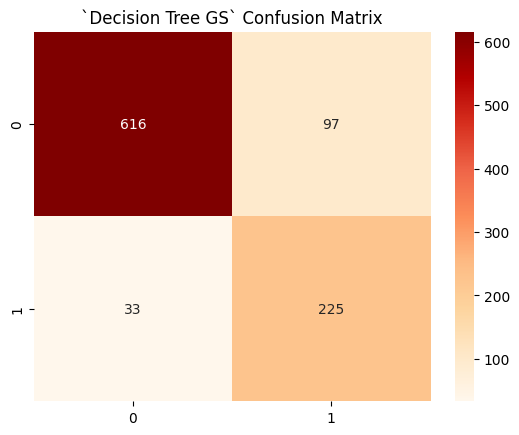

In [126]:
cf_matrix = confusion_matrix(y_test, y_pred_tree_resample)
sns.heatmap(cf_matrix , annot=True,fmt = "d", cmap='OrRd')
plt.title("`Decision Tree GS` Confusion Matrix")

In [127]:
param_grid = {
    'max_depth': [3, 5, 7, 9, 11, None],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3],
    'criterion': ['gini', 'entropy']
}

tree = DecisionTreeClassifier()

random_search = RandomizedSearchCV(estimator=tree, param_distributions=param_grid, n_iter=10, scoring='recall', cv=5, random_state=42)
random_search.fit(X_resampled, y_resampled)

print("Best hyperparameters: ", random_search.best_params_)
print("Best score: ", random_search.best_score_)

Best hyperparameters:  {'min_samples_split': 4, 'min_samples_leaf': 1, 'max_depth': 5, 'criterion': 'gini'}
Best score:  0.8286115007012622


In [128]:
dt_classifier_rs = DecisionTreeClassifier(min_samples_split=4, min_samples_leaf=2, max_depth=5)

dt_classifier_rs.fit(X_resampled, y_resampled)

y_pred_tree_rs = dt_classifier_rs.predict(X_test)

report = classification_report(y_test, y_pred_tree_rs)
print(report)

              precision    recall  f1-score   support

           0       0.93      0.68      0.79       713
           1       0.49      0.85      0.62       258

    accuracy                           0.73       971
   macro avg       0.71      0.77      0.70       971
weighted avg       0.81      0.73      0.74       971



Text(0.5, 1.0, '`Decision Tree RS` Confusion Matrix')

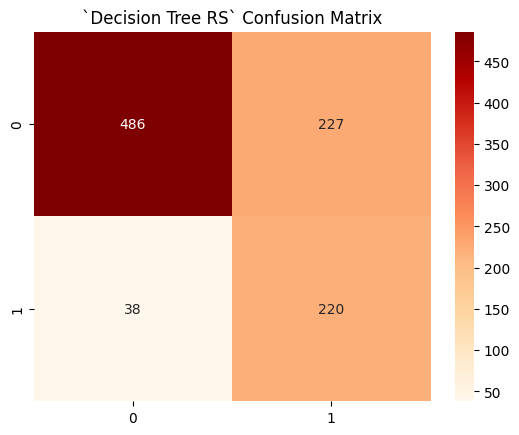

In [129]:
cf_matrix = confusion_matrix(y_test, y_pred_tree_rs)
sns.heatmap(cf_matrix , annot=True,fmt = "d", cmap='OrRd')
plt.title("`Decision Tree RS` Confusion Matrix")

Dengan GridSearchCV dan RandomizedSearchCV pada Decision Tree, dan juga menggunakan hyperparameter terbaik dari keduanya, performa model serupa dan dapat dikatakan cukup bagus yakni 84% dan 86%. <br>

#### **2. Logistic Regression**

In [130]:
hyperparam_c = [1000, 100, 10, 1, 0.1, 0.01, 0.001, 0.0001]
best_score = 0
val_score = []

for i in hyperparam_c:
    logreg = LogisticRegression(solver = 'liblinear', C = i)
    logreg.fit(X_resampled, y_resampled)

    y_pred_logreg_resample = logreg.predict(X_test)
    score_tmp = recall_score(y_test, y_pred_logreg_resample)

    if score_tmp > best_score:
        best_score = score_tmp
        best_param = i


print('Skor terbaik :', best_score)
print('Hyperparameter terbaik :', best_param)

Skor terbaik : 0.9031007751937985
Hyperparameter terbaik : 0.0001


In [131]:
logreg_before = LogisticRegression(solver = 'liblinear', C = 1)
logreg_after = LogisticRegression(solver = 'liblinear', C = 0.0001)

In [132]:
logreg_before.fit(X_resampled, y_resampled)
y_pred_before = logreg_before.predict(X_test)
print(classification_report(y_test, y_pred_before))

              precision    recall  f1-score   support

           0       0.91      0.75      0.82       713
           1       0.53      0.80      0.64       258

    accuracy                           0.76       971
   macro avg       0.72      0.77      0.73       971
weighted avg       0.81      0.76      0.77       971



In [133]:
logreg_after.fit(X_resampled, y_resampled)
y_pred_after = logreg_after.predict(X_test)
print(classification_report(y_test, y_pred_after))

              precision    recall  f1-score   support

           0       0.94      0.57      0.71       713
           1       0.43      0.90      0.58       258

    accuracy                           0.66       971
   macro avg       0.69      0.74      0.65       971
weighted avg       0.81      0.66      0.68       971



Text(0.5, 1.0, '`Model Final Logistic Regression` Confusion Matrix')

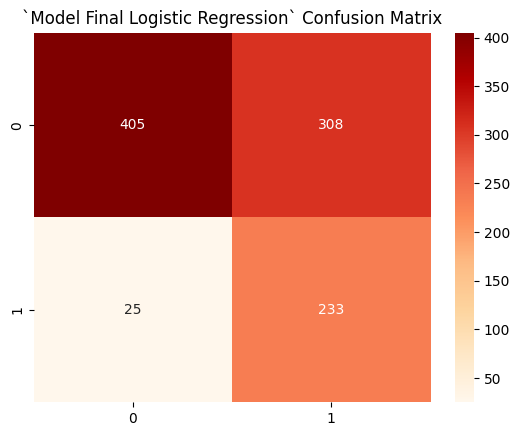

In [134]:
cf_matrix = confusion_matrix(y_test, y_pred_after)
sns.heatmap(cf_matrix , annot=True,fmt = "d", cmap='OrRd')
plt.title("`Model Final Logistic Regression` Confusion Matrix")

Dengan membandingkan model Logistic Regression dengan hyperparameter terbaik, model yang semula memiliki skor Recall 79% meningkat secara signifikan menjadi 90%. Skor Recall ini lebih baik dari model Decision Tree sebelumnya, tetapi jika dilihat pada kuadran atas, model Logistic Regression ini masih memiliki angka FP yang cukup tinggi. 

#### **3. KNN**

              precision    recall  f1-score   support

           0       0.93      0.71      0.80       713
           1       0.52      0.86      0.64       258

    accuracy                           0.75       971
   macro avg       0.72      0.78      0.72       971
weighted avg       0.82      0.75      0.76       971

Recall: 86.05 %


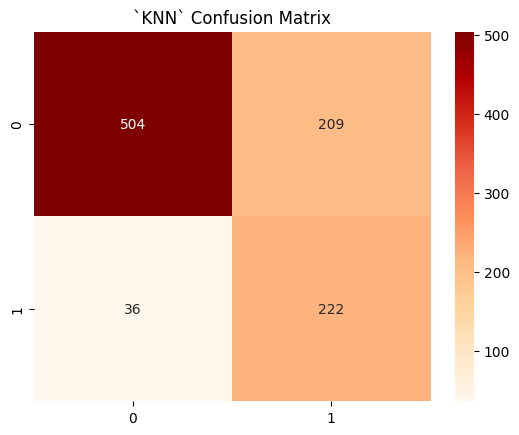

In [135]:
knn_scaled = KNeighborsClassifier(n_neighbors=25)
knn_scaled.fit(X_resampled, y_resampled)

y_pred_class_scaled_resample = knn_scaled.predict(X_test)

print(classification_report(y_test, y_pred_class_scaled_resample))

recall_knn_resample = recall_score(y_test, y_pred_class_scaled_resample)
print("Recall:", round(recall_knn_resample*100, 2), '%')

cf_matrix = confusion_matrix(y_test, y_pred_class_scaled_resample)
sns.heatmap(cf_matrix , annot=True,fmt = "d", cmap='OrRd')
plt.title("`KNN` Confusion Matrix")
plt.show()

Model KKN juga dapat dibilang sudah cukup baik dengan skor Recall 84.88% tetapi masih di bawah skor model Logistic Regression sebelumnya. 

#### **4. SVM**

              precision    recall  f1-score   support

           0       0.92      0.65      0.76       713
           1       0.46      0.83      0.60       258

    accuracy                           0.70       971
   macro avg       0.69      0.74      0.68       971
weighted avg       0.80      0.70      0.72       971

Recall: 83.33 %


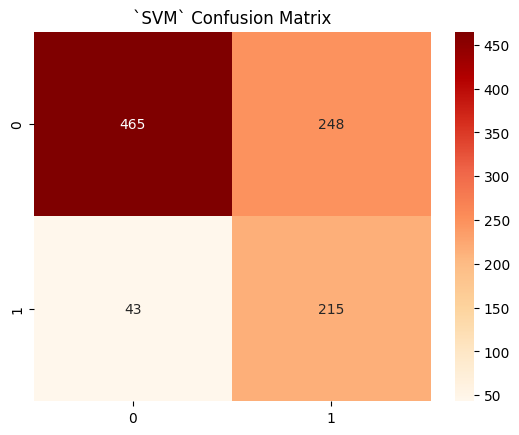

In [136]:
model.svm = SVC(kernel='linear') 
model.svm.fit(X_resampled,y_resampled)
y_pred_class_svm_resample = model.svm.predict(X_test)
metrics.accuracy_score(y_test, y_pred_class_svm_resample)

print(classification_report(y_test, y_pred_class_svm_resample))

recall_svm_resample = recall_score(y_test, y_pred_class_svm_resample)
print("Recall:", round(recall_svm_resample*100, 2), '%')

cf_matrix = confusion_matrix(y_test, y_pred_class_svm_resample)
sns.heatmap(cf_matrix , annot=True,fmt = "d", cmap='OrRd')
plt.title("`SVM` Confusion Matrix")
plt.show()

Model SVM ini juga dapat dibilang sudah cukup baik dengan skor Recall 81.78% tetapi masih di bawah skor model Logistic Regression sebelumnya. Untuk angka FP mirip dengan model KNN. 

#### **5. Random Forest**

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       713
           1       0.96      1.00      0.98       258

    accuracy                           0.99       971
   macro avg       0.98      0.99      0.98       971
weighted avg       0.99      0.99      0.99       971

Recall: 100.0 %


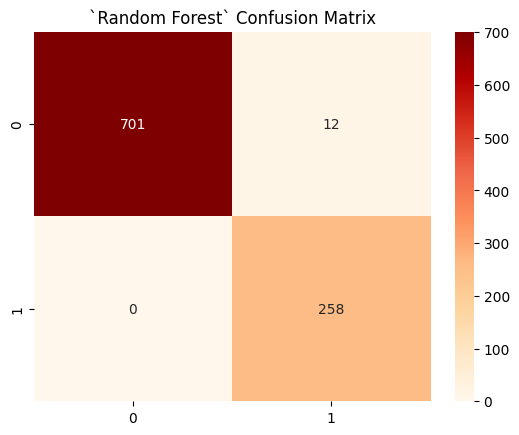

In [137]:
model = make_pipeline(RandomForestClassifier())
model.fit(X_resampled, y_resampled)
y_pred_ranfor_resample = model.predict(X_test)

cf_matrix = confusion_matrix(y_test, y_pred_ranfor_resample)
sns.heatmap(cf_matrix , annot=True,fmt = "d", cmap='OrRd')
plt.title("`Random Forest` Confusion Matrix")

print(classification_report(y_test, y_pred_ranfor_resample))

recall_rf_resample = recall_score(y_test, y_pred_ranfor_resample)
print("Recall:", round(recall_rf_resample*100, 2), '%')

In [138]:
param_grid = {
    'n_estimators': [50, 100, 150, 200] 
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search.fit(X_resampled, y_resampled)

# mencari parameter terbaik
best_n_estimators = grid_search.best_params_['n_estimators']
print("n_estimators terbaik :", best_n_estimators)

n_estimators terbaik : 100


              precision    recall  f1-score   support

           0       1.00      0.98      0.99       713
           1       0.96      1.00      0.98       258

    accuracy                           0.99       971
   macro avg       0.98      0.99      0.99       971
weighted avg       0.99      0.99      0.99       971

Recall: 100.0 %


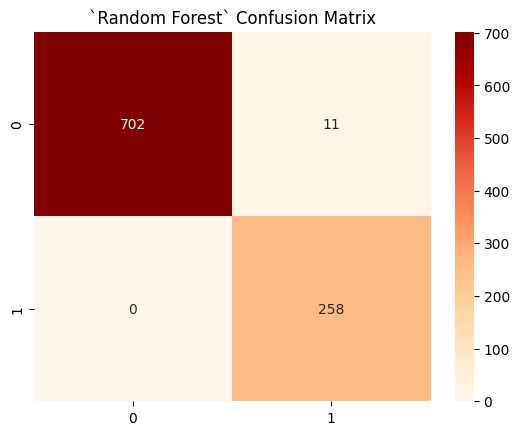

In [148]:
model = make_pipeline(RandomForestClassifier(n_estimators=100))
model.fit(X_resampled, y_resampled)
y_pred_ranfor_resample = model.predict(X_test)

cf_matrix = confusion_matrix(y_test, y_pred_ranfor_resample)
sns.heatmap(cf_matrix , annot=True,fmt = "d", cmap='OrRd')
plt.title("`Random Forest` Confusion Matrix")

print(classification_report(y_test, y_pred_ranfor_resample))

recall_rf_resample = recall_score(y_test, y_pred_ranfor_resample)
print("Recall:", round(recall_rf_resample*100, 2), '%')

In [149]:
cf_final = pd.DataFrame(data=confusion_matrix(y_test, y_pred_ranfor_resample), 
                   columns=['Predicted Not Churn [0]', 'Predicted Churn [1]'],
                   index = ['Actual Not Churn [0]', 'Actual Churn [1]'])
print(cf_final)

<IPython.core.display.Javascript object>

                      Predicted Not Churn [0]  Predicted Churn [1]
Actual Not Churn [0]                      702                   11
Actual Churn [1]                            0                  258


Model Random Forest ini memiliki skor yang tertinggi dibandingkan semua model sebelumnya. Dengan metode SMOTE, model mengalami peningkatan yang signifikan bahkan sempurna. Selain skor Recall yang mendekati sempurna, skor Precision dan F1 Score-nya pun mendekati sempurna. Sesuai dengan konteks bisnis, memang yang menjadi perhatian utama adalah skor Recall saja, tetapi jika FP dan TP terprediksi secara baik pula, jelas model menjadi lebih reliabel untuk digunakan secara keseluruhan. 

> Model final ini dapat memprediksi secara tepat hampir semua pelanggan yang baik yang akan Churn maupun yang tidak akan Churn. Analoginya, dari 100 pelanggan yang sebenarnya akan Churn, model dapat memprediksi sepenuhnya 100 orang. Catatan, model ini sudah di-run berkali-kali dan masih memiliki angka evaluasi yang sama, tetapi tetap ada kemungkinan skor Recall menjadi 98%-99%.

# **Key Takeaways and Conclusion**

### **Questions**

> 1. Bagaimana profil umum pelanggan berdasarkan data secara keseluruhan? <br>
> 1. Bagaimana profil pelanggan berdasarkan kecenderungannya untuk *churn*? <br>
> 1. Berapa kerugian perusahaan karena pelanggan yang *Churn*? <br>
> 1. Bagaimana pembuatan model *maching learning* terbaik yang dapat digunakan dalam kasus ini? <br>
> 1. Bagaimana akurasi dan limitasi dari model tersebut? <br>
> 1. Apa saja solusi *(actionable recommendations)* yang dapat dilakukan perusahaan untuk mencegah pelanggan *Churn*? <br>
> 1. Apa dampak dari solusi tersebut terhadap bisnis perusahaan?<br>
> 1. Apa saja rekomendasi untuk meningkatkan *project* agar lebih baik lagi? <br>

### **Case Related**

Mayoritas pelanggan tidak memiliki tanggungan. Pelanggan lebih memilih paket bulanan *(Month to Month)* dibandingkan paket jangka lama seperti satu tahun maupun dua tahun. Pelanggan juga lebih banyak yang memilih Paperless Billing dibandingkan tagihan cetak. Layanan internet yang paling banyak diminati adalah Fiber Optic, tetapi tidak jauh berbeda dengan DSL. Mayoritas pelanggan tidak memanfaatkan fasilitas layanan Online Security, Online Back Up, Device Protection, dan Tech Support.

Terkait kecenderungan untuk *Churn*, pelanggan yang tidak memiliki tanggungan justru Churn lebih banyak daripada yang memiliki tanggungan.
Pelanggan yang menggunakan layanan internet dengan Fiber Optic lebih banyak yang Churn daripada yang menggunakan DSL maupun yang tidak menggunakan layanan internet sama sekali. Pelanggan dengan paket bulanan *(month-to-month)* signifikan Churn lebih banyak dibandingkan paket tahunan maupun paket 2 tahun. Pelanggan yang menggunakan Paperless Billing lebih banyak yang Churn daripada yang non-Paperless Billing. Pelanggan yang tidak menggunakan fasilitas layanan Online Security, Online Back Up, Device Protection, dan Tech Support lebih banyak yang Churn dibandingkan dengan pelanggan yang menggunakan layanan tersebut.

Dalam kasus ini, pelanggan yang berhenti menggunakan layanan mengakibatkan perusahaan mengalami kerugian mencapai 30% dari total pendapatan atau setara dengan 96 ribu dollar.

Model machine learning yang digunakan adalah klasifikasi, karena target yang ingin dicari berupa label yaitu *Churn* dan *tidak Churn*. Pembuatan machine learning akan dijabarkan, sebagai berikut:
- Preprocessing data dengan pengecekan *missing value*, menghapus data duplikat, penyesuaian format tipe data, dan merapikan isi data observasi yang ambigu. 
- Pengecekan distribusi data target dan menemukan bahwa dataset tidak seimbang dengan data non-Churn tiga kali lipat lebih banyak dibandingkan data Churn.
- Features selection dengan menggunakan fitur numerikal terlebih dahulu kemudian menggunakan seluruh fitur kategorikal juga. 
- Feature engineering yang digunakan adalah One-Hot Encoding pada fitur kategorikal dan MinMax Scaler pada fitur numerikal. 
- Membuat model tahap pertama dengan menggunakan fitur numerikal saja yaitu durasi berlangganan dan nominal tagihan bulanan (Tenure dan MonthlyCharges) tetapi hasil model belum ada yang cukup baik dan reliabel untuk digunakan.
- Membuat model tahap kedua dengan menggunakan semua fitur termasuk kategorikal (Dependants, InternetService, DeviceProtection, dll) tetapi masih belum ada model yang cukup baik dan reliabel untuk digunakan.
- Model yang diuji coba antara lain Logistic Regression, KNN, Decision Tree, SVM, dan Random Forest.
- Hyperparameter tuning dan cross validation dilakukan dalam pemodelan ini.
- Evaluasi yang digunakan adalah Confusion Matrix yang berfokus pada skor Recall karena pada kasus ini FN (False Negative) adalah yang kritikal. False Negative adalah pelanggan yang sebenarnya akan Churn tetapi diprediksi tidak Churn oleh model. 
- Penggunaan metode SMOTE karena indikasi pembuatan model sulit karena data yang tidak seimbang.
- Pengujian ulang dan model Random Forest yang terbaik dengan skor Recall mencapai 100%. Ibaratnya dari 100 pelanggan yang sebenarnya akan Churn, model dapat mendeteksi secara akurat sepenuhnya 100 pelanggan tersebut. Selain itu, model ini pun memiliki skor tinggi pada nilai keseluruhan (Accuracy Score), Precision, maupun F1 score. 
- Catatan bahwa pengulangan model bisa menurunkan skor Recall tetapi hanya di 98%-99% saja. 
- Limitasi dari model ini adalah dapat digunakan pada data pelanggan dengan durasi berlangganan 0 sampai 72 bulan dan tagihan bulanan dalam rentang $18.8 sampai dengan $118.65; Data observasi dengan angka di luar batasan tersebut tidak dapat menggunakan model ini dan perlu penyesuaian pada model.

Cara kerja model:
- Pembuatan Sampel: Random Forest mengambil sampel acak dengan penggantian dari dataset pelatihan. Setiap sampel yang diambil akan memiliki ukuran yang sama dengan dataset pelatihan asli.
- Pembangunan Pohon Keputusan: Untuk setiap sampel yang diambil, pohon keputusan dibangun dengan menggunakan sebagian data pelatihan. Pada setiap node dalam pohon keputusan, beberapa fitur secara acak dipilih sebagai kandidat pemisah (splitter). Pemilihan pemisah dilakukan berdasarkan kriteria seperti Gini Impurity atau Information Gain.
- Penggabungan Pohon: Setelah pembangunan pohon keputusan, hasil prediksi dari setiap pohon digabungkan untuk menghasilkan prediksi akhir. Untuk masalah klasifikasi, penggabungan biasanya menggunakan voting mayoritas, yaitu prediksi kelas yang paling sering muncul dari semua pohon. Sedangkan untuk masalah regresi, penggabungan dapat menggunakan rata-rata atau median dari prediksi pohon.

Dengan adanya model ini, perusahaan PT Telco Connect memiliki kesempatan untuk mendeteksi pelanggan yang Churn seakurat dan sedini mungkin untuk dapat melakukan pencegahan. Sesuai dengan tujuan perusahaan dalam kasus ini yaitu menggunakan alokasi dana *Retention Customer* secara optimal dan tepat sasaran. Tentunya, target yang disasar adalah **pelanggan yang berpotensi akan Churn**. Pelanggan yang berpotensi akan Churn mulai tidak menemukan benefit dari menggunakan layanan. Oleh karena itu, alokasi dana ini dapat digunakan untuk:
- subscription CRM tool sebagai metode untuk selalu membangun koneksi dan interaksi dengan pelanggan, caranya seperti mengirimkan *Newsletter* rutin ke email pelanggan, mengirimkan *Push Notification* secara berkala dan relevan, menampilkan *Pop Up Banner* pada aplikasi untuk mendorong pelanggan melakukan purchase, dan lainnya
- memberikan potongan atau promosi agar pelanggan mau *Upselling* layanan, misalnya pelanggan yang sudah menggunakan layanan internet akan mendapatkan potongan ketika ingin menggunakan layanan Device Security
- memberikan harga spesial pada pelanggan untuk menambah layanan di hari ulang tahunnya
- memberikan promosi ketika pelanggan sudah menggunakan layanan tertentu selama kurun waktu tertentu
- dan lainnya

Dari dataset ini, faktanya adalah perusahaan kehilangan 26.5% pelanggan dan 30% pendapatan. 
Dampak dari solusi ini secara terukur adalah<br>
- **[1] Skenario Ideal** (anggap setiap strategi di atas berhasil sesuai harapan), pelanggan yang Churn dan pendapatan yang hilang turun secara signifikan menjadi nol atau hanya di 1-2% saja. Analoginya, yang tadinya dari 100 pelanggan perusahaan bisa kehilangan 26 pelanggan, sekarang tidak ada yang Churn atau hanya 1-2 pelanggan saja yang berhenti menggunakan layanan.
- **[2] Skenario Moderate** (tingkat kesuksesan hanya 50%), pelanggan yang Churn turun menjadi 13% saja dan pendapatan hilang 15%. Analoginya, dari 100 pelanggan yang semula akan Churn sebanyak 26 pelanggan sekarang menjadi kurang lebih 13 pelanggan. <br><br>

Skenario dan analogi di atas juga berlaku untuk pendapatan. 30% pendapatan yang setara 96 ribu dollar dalam dataset ini dapat kita turunkan secara signifikan. Persentase ini bersifat relatif, jika kedepannya jumlah tagihan bulanan semakin meningkat, maka persentase 30% dalam konteks ini pun akan semakin besar pula. 
**Catatan bahwa implementasi strategi ini hanya menggunakan dana yang memang sudah dialokasikan untuk Customer Retention tanpa overbudget.**


### **Dataset Related**

Terkait dengan *project* dan dataset, saya merekomendasikan:
- Fitur `Dependants` tidak boolean melainkan jumlah tanggungan secara angka absolut mulai dari 0, misalnya 2 orang atau 3 orang tanggungan. Adanya indikasi bahwa jumlah tanggungan mempengaruhi kecenderungan Churn atau tidak Churn. 
- Lebih informatif jika setiap layanan itu berisi nominal harga layanan dibandingkan hanya *boolean* juga. Misalnya jika user tidak menggunakan layanan tersebut data akan *null* atau 0.
- Kolom tanggal pertama kali pelanggan melakukan registrasi untuk mengetahui rentang waktu dataset. 

# **Pickle**

### **Save Model**

In [150]:
model

Pipeline(steps=[('randomforestclassifier', RandomForestClassifier())])

In [151]:
filename = 'model_telco_churn.sav'
pickle.dump(model, open(filename, 'wb'))

### **Load Model**

In [152]:
filename = 'model_telco_churn.sav'
loaded_model = pickle.load(open(filename, 'rb'))

In [153]:
loaded_model

Pipeline(steps=[('randomforestclassifier', RandomForestClassifier())])

In [154]:
loaded_model.predict(X_resampled)

array([1, 0, 1, ..., 1, 1, 1])

### **Random Check Model to Dataset**

In [157]:
index_cust = [7]

for i in index_cust:
    random_check = pd.DataFrame(X.iloc[[i]])
    display(pd.DataFrame(df.iloc[[i]]))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Churn,Dependents_No,Dependents_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,...,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,PaperlessBilling_No,PaperlessBilling_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,tenure,MonthlyCharges
7,1,True,False,True,False,True,False,True,False,False,...,False,True,False,False,True,True,False,False,0.152778,0.252879


In [158]:
print('Result :', loaded_model.predict(random_check))

print('[1] Churn')
print('[0] No Churn')

Result : [1]
[1] Churn
[0] No Churn


Dari percobaan di atas, model sudah berhasil disimpan dan juga di-load untuk memprediksi dataset.<br>
Contoh di atas yaitu pelanggan dengan Index nomor 7 dan model memprediksi pelanggan *Churn* secara akurat sesuai dengan dataset. 